In [2]:
import os
os.environ["PATH"] += os.pathsep + 'D:/GraphViz/release/bin'

In [1]:
import pandas as pd
import numpy as np

In [3]:
trainData = pd.read_csv('./train_AUpWtIz/train.csv')
itemData = pd.read_csv('./train_AUpWtIz/item_data.csv')
customer_transaction_data = pd.read_csv('./train_AUpWtIz/customer_transaction_data.csv')
customer_demographics = pd.read_csv('./train_AUpWtIz/customer_demographics.csv')
coupon_item_mapping = pd.read_csv('./train_AUpWtIz/coupon_item_mapping.csv')
campaign_data = pd.read_csv('./train_AUpWtIz/campaign_data.csv')

testData = pd.read_csv('test_QyjYwdj.csv')


### Topper Solution

In [6]:
train=pd.read_csv('./train_AUpWtIz/train.csv')
camp=pd.read_csv('./train_AUpWtIz/campaign_data.csv')
trans=pd.read_csv('./train_AUpWtIz/customer_transaction_data.csv')
cust=pd.read_csv('./train_AUpWtIz/customer_demographics.csv')
coupon=pd.read_csv('./train_AUpWtIz/coupon_item_mapping.csv')
item=pd.read_csv('./train_AUpWtIz/item_data.csv')
camp.start_date=pd.to_datetime(camp.start_date,format='%d/%m/%y')
camp.end_date=pd.to_datetime(camp.end_date,format='%d/%m/%y')
test=pd.read_csv('test_QyjYwdj.csv')

In [8]:
df = camp

In [9]:
df['camp_duration']=(df['end_date']-df['start_date']).dt.days
df['campaign_start_day']=df['start_date'].dt.day
df['campaign_start_dow']=df['start_date'].dt.dayofweek
df['campaign_end_day']=df['end_date'].dt.day
df['campaign_end_dow']=df['end_date'].dt.dayofweek
df=df.sort_values('start_date').reset_index(drop=True)

In [10]:
df.head()

campaign_id campaign_type start_date   end_date  camp_duration  \
0           26             X 2012-08-12 2012-09-21             40   
1           27             Y 2012-08-25 2012-10-27             63   
2           28             Y 2012-09-16 2012-11-16             61   
3           29             Y 2012-10-08 2012-11-30             53   
4           30             X 2012-11-19 2013-01-04             46   

   campaign_start_day  campaign_start_dow  campaign_end_day  campaign_end_dow  
0                  12                   6                21                 4  
1                  25                   5                27                 5  
2                  16                   6                16                 4  
3                   8                   0                30                 4  
4                  19                   0                 4                 4

In [14]:
df.campaign_id.shift(2)

0      NaN
1      NaN
2     26.0
3     27.0
4     28.0
5     29.0
6     30.0
7      1.0
8      2.0
9      3.0
10     4.0
11     5.0
12     6.0
13     7.0
14     8.0
15     9.0
16    10.0
17    11.0
18    12.0
19    13.0
20    16.0
21    17.0
22    18.0
23    19.0
24    20.0
25    22.0
26    21.0
27    23.0
Name: campaign_id, dtype: float64

In [15]:
coupon.groupby('coupon_id')['item_id'].nunique().to_dict()

{1: 39,
 2: 2,
 3: 17,
 4: 24,
 5: 7,
 6: 3713,
 7: 2942,
 8: 3718,
 9: 1535,
 10: 11,
 11: 146,
 12: 1,
 13: 3,
 14: 10,
 15: 3,
 16: 7,
 17: 18,
 18: 27,
 19: 114,
 20: 3372,
 21: 3153,
 22: 4947,
 23: 11813,
 24: 4394,
 25: 6,
 26: 8,
 27: 125,
 28: 24,
 29: 3385,
 30: 3151,
 31: 4873,
 32: 11814,
 33: 4394,
 34: 53,
 35: 18,
 36: 5,
 37: 1085,
 38: 41,
 39: 27,
 40: 112,
 41: 125,
 42: 1589,
 43: 1589,
 44: 95,
 45: 18,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 2,
 53: 1,
 54: 1,
 55: 5,
 56: 76,
 57: 24,
 58: 2,
 59: 12,
 60: 1,
 61: 4,
 62: 31,
 63: 12,
 64: 65,
 65: 12,
 66: 7,
 67: 27,
 68: 15,
 69: 7,
 70: 7,
 71: 4,
 72: 7,
 73: 9,
 74: 3,
 75: 8,
 76: 1,
 77: 1,
 78: 14,
 79: 2,
 80: 1,
 81: 4,
 82: 8,
 83: 18,
 84: 5,
 85: 4,
 86: 7,
 87: 3,
 88: 2,
 89: 17,
 90: 7,
 91: 87,
 92: 4,
 93: 7,
 94: 12,
 95: 2,
 96: 13,
 97: 37,
 98: 11,
 99: 1,
 100: 5,
 101: 17,
 102: 9,
 103: 3,
 104: 7,
 105: 17,
 106: 4,
 107: 38,
 108: 17,
 109: 10,
 110: 16,
 111: 11,
 112: 14

### Start Coupon item

In [4]:
coupon_item_mapping.shape

(92663, 2)

In [925]:
coupon_item_mapping.nunique()

coupon_id     1116
item_id      36289
dtype: int64

In [5]:
coupon_item_merged = pd.merge(coupon_item_mapping, itemData, on="item_id", how = "inner")

In [9]:
coupon_item_merged.shape, customer_transaction_data.shape

((92663, 5), (1324566, 7))

In [13]:
len(np.unique(coupon_item_mapping['item_id'])), len(np.unique(coupon_item_merged['item_id']))

(36289, 36289)

In [14]:
useful_item_ids = np.unique(coupon_item_merged['item_id'])

In [7]:
coupon_item_merged.head()

coupon_id  item_id  brand brand_type category
0        105       37     56      Local  Grocery
1          6       37     56      Local  Grocery
2         22       37     56      Local  Grocery
3         31       37     56      Local  Grocery
4        107       75     56      Local  Grocery

In [26]:
coupon_item_merged_group = coupon_item_merged.groupby(['coupon_id']).agg({'item_id':pd.Series.nunique, 'brand':pd.Series.nunique, 
                                'brand_type': pd.Series.nunique, 'category':pd.Series.nunique}).reset_index()
coupon_item_merged_group.columns = ['coupon_id','item_id_each_coupon','brand_each_coupon','brand_type_each_coupon',
                                    'category_each_coupon']
coupon_item_merged_group_full = pd.merge(coupon_item_merged, coupon_item_merged_group, on="coupon_id", how="inner")

In [38]:
coupon_item_merged_group_full[coupon_item_merged_group_full['coupon_id']==1].head()

coupon_id  item_id  brand   brand_type          category  \
89147          1    51025   1475  Established  Natural Products   
89148          1     4140   1475  Established  Natural Products   
89149          1    44112   1475  Established  Natural Products   
89150          1    17091   1475  Established  Natural Products   
89151          1    44530   1475  Established  Natural Products   

       item_id_each_coupon  brand_each_coupon  brand_type_each_coupon  \
89147                   39                  3                       1   
89148                   39                  3                       1   
89149                   39                  3                       1   
89150                   39                  3                       1   
89151                   39                  3                       1   

       category_each_coupon  
89147                     2  
89148                     2  
89149                     2  
89150                     2  
89151                     2

In [27]:
coupon_item_merged_group_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92663 entries, 0 to 92662
Data columns (total 9 columns):
coupon_id                 92663 non-null int64
item_id                   92663 non-null int64
brand                     92663 non-null int64
brand_type                92663 non-null object
category                  92663 non-null object
item_id_each_coupon       92663 non-null int64
brand_each_coupon         92663 non-null int64
brand_type_each_coupon    92663 non-null int64
category_each_coupon      92663 non-null int64
dtypes: int64(7), object(2)
memory usage: 7.1+ MB


In [35]:
addDict = {col:'sum' for col in ['brand_type_Established', 'brand_type_Local', 'category_Bakery',
       'category_Dairy, Juices & Snacks', 'category_Flowers & Plants',
       'category_Garden', 'category_Grocery', 'category_Meat',
       'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Restauarant', 'category_Salads',
       'category_Seafood', 'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)'] }
addDict.update({'item_id_each_coupon':'mean', 'brand_each_coupon': 'mean','brand_type_each_coupon': 'mean',
                                    'category_each_coupon':'mean'})

In [29]:
pd.get_dummies(coupon_item_merged_group_full).columns

Index(['coupon_id', 'item_id', 'brand', 'item_id_each_coupon',
       'brand_each_coupon', 'brand_type_each_coupon', 'category_each_coupon',
       'brand_type_Established', 'brand_type_Local', 'category_Bakery',
       'category_Dairy, Juices & Snacks', 'category_Flowers & Plants',
       'category_Garden', 'category_Grocery', 'category_Meat',
       'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Restauarant', 'category_Salads',
       'category_Seafood', 'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)'],
      dtype='object')

In [39]:
coupon_item_merged_group_full = pd.get_dummies(coupon_item_merged_group_full).groupby(['coupon_id']).agg(addDict).reset_index() 

In [21]:
coupon_item_merged.to_csv('coupon_item_merged.csv', index=False)

In [40]:
coupon_item_merged_group_full.to_csv('coupon_item_merged_group_full.csv', index=False)

In [108]:
coupon_item_merged.head()

coupon_id  item_id  brand brand_type category
0        105       37     56      Local  Grocery
1          6       37     56      Local  Grocery
2         22       37     56      Local  Grocery
3         31       37     56      Local  Grocery
4        107       75     56      Local  Grocery

In [110]:
coupon_item_merged_group_full.head(6)

coupon_id  brand_type_Established  brand_type_Local  category_Bakery  \
0          1                    39.0               0.0                0   
1          2                     2.0               0.0                0   
2          3                    17.0               0.0                0   
3          4                    24.0               0.0                0   
4          5                     7.0               0.0                0   
5          6                  3075.0             638.0                0   

   category_Dairy, Juices & Snacks  category_Flowers & Plants  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        0.0   
4                              0.0                        0.0   
5                            259.0                        0.0   

   category_Garden  category_Grocery  category_Meat  category_Miscellaneous  \
0                0               9.0            0.0                       0   
1                0               2.0            0.0                       0   
2                0              17.0            0.0                       0   
3                0              24.0            0.0                       0   
4                0               0.0            0.0                       0   
5                0            3082.0            2.0                       0   

   ...  category_Restauarant  category_Salads  category_Seafood  \
0  ...                     0                0               0.0   
1  ...                     0                0               0.0   
2  ...                     0                0               0.0   
3  ...                     0                0               0.0   
4  ...                     0                0               0.0   
5  ...                     0                0             128.0   

   category_Skin & Hair Care  category_Travel  category_Vegetables (cut)  \
0                        0.0                0                          0   
1                        0.0                0                          0   
2                        0.0                0                          0   
3                        0.0                0                          0   
4                        0.0                0                          0   
5                        0.0                0                          0   

   item_id_each_coupon  brand_each_coupon  brand_type_each_coupon  \
0                   39                  3                       1   
1                    2                  1                       1   
2                   17                  2                       1   
3                   24                  1                       1   
4                    7                  1                       1   
5                 3713                170                       2   

   category_each_coupon  
0                     2  
1                     1  
2                     1  
3                     1  
4                     1  
5                     5  

[6 rows x 24 columns]

### End Coupon Item Customer transaction start

In [552]:
customer_transaction_data.head()

date  customer_id  item_id  quantity  selling_price  other_discount  \
0  2012-01-02         1501    26830         1          35.26          -10.69   
1  2012-01-02         1501    54253         1          53.43          -13.89   
2  2012-01-02         1501    31962         1         106.50          -14.25   
3  2012-01-02         1501    33647         1          67.32            0.00   
4  2012-01-02         1501    48199         1          71.24          -28.14   

   coupon_discount  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [553]:
customer_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
date               1324566 non-null object
customer_id        1324566 non-null int64
item_id            1324566 non-null int64
quantity           1324566 non-null int64
selling_price      1324566 non-null float64
other_discount     1324566 non-null float64
coupon_discount    1324566 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [638]:
customer_transaction_useful_item_data = customer_transaction_data[customer_transaction_data['item_id'].isin(useful_item_ids)]

In [557]:
customer_transaction_useful_item_data.shape

(768432, 7)

In [20]:
customer_transaction_useful_item_data.to_csv('customer_transaction_useful_item_data.csv', index=False)

In [639]:
customer_transaction_useful_item_data.head()

date  customer_id  item_id  quantity  selling_price  other_discount  \
0  2012-01-02         1501    26830         1          35.26          -10.69   
1  2012-01-02         1501    54253         1          53.43          -13.89   
2  2012-01-02         1501    31962         1         106.50          -14.25   
4  2012-01-02         1501    48199         1          71.24          -28.14   
5  2012-01-02         1501    57397         1          71.24          -28.14   

   coupon_discount  
0              0.0  
1              0.0  
2              0.0  
4              0.0  
5              0.0

In [640]:
customer_transaction_useful_item_data['date'] = pd.to_datetime(customer_transaction_useful_item_data['date'], yearfirst=True)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [646]:
customer_transaction_useful_item_data.drop(['cust_month'], axis = 1, inplace=True)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [606]:
customer_transaction_useful_item_data['date'].min(), customer_transaction_useful_item_data['date'].max()

(Timestamp('2012-01-02 00:00:00'), Timestamp('2013-07-03 00:00:00'))

In [58]:
len(np.unique(customer_transaction_useful_item_data['item_id']))

36287

In [560]:
customer_transaction_useful_item_data.head()

date  customer_id  item_id  quantity  selling_price  other_discount  \
0 2012-01-02         1501    26830         1          35.26          -10.69   
1 2012-01-02         1501    54253         1          53.43          -13.89   
2 2012-01-02         1501    31962         1         106.50          -14.25   
4 2012-01-02         1501    48199         1          71.24          -28.14   
5 2012-01-02         1501    57397         1          71.24          -28.14   

   coupon_discount  
0              0.0  
1              0.0  
2              0.0  
4              0.0  
5              0.0

In [605]:
len(np.unique(customer_transaction_useful_item_data[(customer_transaction_useful_item_data['date'] > '2013-01-01') & 
                                                   (customer_transaction_useful_item_data['date'] < '2013-03-11')]['item_id']))

15714

In [831]:
customer_transaction_useful_item_data_partial = customer_transaction_useful_item_data[(customer_transaction_useful_item_data['date'] > '2013-01-01') & 
                                                   (customer_transaction_useful_item_data['date'] < '2013-03-11')]

In [832]:
len(np.unique(customer_transaction_useful_item_data_partial['item_id']))

32109

In [833]:
customer_transaction_useful_item_data_partial = customer_transaction_useful_item_data[(customer_transaction_useful_item_data['date'] > '2013-01-01') & 
                                                   (customer_transaction_useful_item_data['date'] < '2013-03-11')]
customer_transaction_useful_item_data_partial['item_price'] = ((customer_transaction_useful_item_data_partial['selling_price'] + 
customer_transaction_useful_item_data_partial['other_discount'] +customer_transaction_useful_item_data_partial['coupon_discount'] ) / customer_transaction_useful_item_data_partial['quantity']).astype('float')

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [834]:
customer_transaction_useful_item_data_partial.head()

date  customer_id  item_id  quantity  selling_price  other_discount  \
0 2012-01-02         1501    26830         1          35.26          -10.69   
1 2012-01-02         1501    54253         1          53.43          -13.89   
2 2012-01-02         1501    31962         1         106.50          -14.25   
4 2012-01-02         1501    48199         1          71.24          -28.14   
5 2012-01-02         1501    57397         1          71.24          -28.14   

   coupon_discount  item_price  
0              0.0       24.57  
1              0.0       39.54  
2              0.0       92.25  
4              0.0       43.10  
5              0.0       43.10

In [835]:
customer_transaction_useful_item_data_partial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587803 entries, 0 to 1015390
Data columns (total 8 columns):
date               587803 non-null datetime64[ns]
customer_id        587803 non-null int64
item_id            587803 non-null int64
quantity           587803 non-null int64
selling_price      587803 non-null float64
other_discount     587803 non-null float64
coupon_discount    587803 non-null float64
item_price         587803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 40.4 MB


In [1034]:
# tran=tran.merge(coup_item,on='item_id',how='left')
customer_transaction_useful_item_data_partial = customer_transaction_useful_item_data_partial.merge(coupon_item_mapping,on='item_id',how="left")

In [1035]:
customer_transaction_useful_item_data_partial=customer_transaction_useful_item_data_partial.merge(customer_transaction_useful_item_data_partial.groupby(['customer_id','coupon_id']).agg({'item_id':'count',
            }).reset_index(),on=['customer_id','coupon_id'],how='left')
customer_transaction_useful_item_data_partial.sample(10)

date  customer_id  item_id_x  quantity  selling_price  other_discount  coupon_discount  item_price  coupon_id  item_id_y
205385 2013-02-15          563      16442         2          71.24            0.00              0.0       35.62         31         21
217660 2013-02-19          802      57978         1          71.24            0.00              0.0       71.24        600          6
193411 2013-02-14          790      33794         1         245.42            0.00              0.0      245.42         23         10
262462 2013-03-01         1312      35952         1          21.37           -6.77              0.0       14.60         21         29
27839  2013-01-07          140      45461         1          71.24            0.00              0.0       71.24        797         18
265561 2013-03-01          372       7709         1          71.24          -17.45              0.0       53.79         31          5
41137  2013-01-10           52      30604         1          63.76           -7.12              0.0       56.64        907          1
86944  2013-01-20          190      60471         1          35.26            0.00              0.0       35.26         32          2
129052 2013-01-31          362      12971         1         106.50            0.00              0.0      106.50         33         48
66048  2013-01-16         1555      62055         1          89.05          -17.45              0.0       71.60       1008          1

In [1036]:
customer_transaction_useful_item_data_partial.columns

Index(['date', 'customer_id', 'item_id_x', 'quantity', 'selling_price', 'other_discount', 'coupon_discount', 'item_price', 'coupon_id', 'item_id_y'], dtype='object')

In [1037]:
customer_transaction_useful_item_data_partial = customer_transaction_useful_item_data[(customer_transaction_useful_item_data['date'] > '2013-01-01') & 
                                                   (customer_transaction_useful_item_data['date'] < '2013-03-11')]
customer_transaction_useful_item_data_partial['item_price'] = ((customer_transaction_useful_item_data_partial['selling_price'] + 
customer_transaction_useful_item_data_partial['other_discount'] +customer_transaction_useful_item_data_partial['coupon_discount'] ) / customer_transaction_useful_item_data_partial['quantity']).astype('float')

customer_segment_data = customer_transaction_useful_item_data_partial.groupby(['customer_id']).agg({'item_id_x':pd.Series.nunique, 'quantity':'sum',
        'selling_price':'mean','other_discount':'mean','coupon_discount':'mean','item_price':'mean'}).reset_index()

customer_segment_data.columns = ['customer_id','num_item_id','tot_quantity','avg_selling_price','avg_other_discount',
                                 'avg_coupon_discount','avg_cust_price']

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [1038]:
customer_segment_data.head()

customer_id  num_item_id  tot_quantity  avg_selling_price  avg_other_discount  avg_coupon_discount  avg_cust_price
0            1           43           234         100.869497          -24.985477            -5.656131       64.458930
1            2            6            23         151.883500           -9.599000             0.000000      131.545250
2            3           32           123          95.838506          -21.780805             0.000000       54.278563
3            4            4            34         228.300000          -13.052143             0.000000       90.372857
4            5           28           226         157.814211          -14.588045             0.000000      107.520414

In [837]:
a = np.unique(customer_transaction_useful_item_data_partial['customer_id'])

In [838]:
b = np.unique(partialTrainData['customer_id'])

In [839]:
c = [i for i in b if i not in a]

In [840]:
len(c), len(a), len(b)

(0, 1582, 1275)

### For more than one month

In [856]:
customer_transaction_useful_item_data_partial_month = customer_transaction_useful_item_data[(customer_transaction_useful_item_data['date'] > '2013-02-01') & 
                                                   (customer_transaction_useful_item_data['date'] < '2013-03-11')]
   
customer_transaction_useful_item_data_partial_month['item_price_month'] = ((customer_transaction_useful_item_data_partial_month['selling_price'] + 
customer_transaction_useful_item_data_partial_month['other_discount'] +customer_transaction_useful_item_data_partial_month['coupon_discount'] ) / customer_transaction_useful_item_data_partial_month['quantity']).astype('float')


customer_segment_data_month = customer_transaction_useful_item_data_partial_month.groupby(['customer_id']).agg({'item_id':pd.Series.nunique, 'quantity':'sum',
        'selling_price':'mean','other_discount':'mean','coupon_discount':'mean','item_price_month':'mean'}).reset_index()

customer_segment_data_month.columns = ['customer_id','num_item_id_month','tot_quantity_month','avg_selling_price_month',
                                       'avg_other_discount_month','avg_coupon_discount_month','avg_cust_price_month']

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Merging All Data

In [104]:
campaign_data_out = pd.read_csv('campaign_data_out.csv')

In [105]:
campaign_data_out.head()

campaign_id campaign_type  start_date    end_date  active_days_num  \
0           24             Y  2013-10-21  2013-12-20               60   
1           25             Y  2013-10-21  2013-11-22               32   
2           20             Y  2013-09-07  2013-11-16               70   
3           23             Y  2013-10-08  2013-11-15               38   
4           21             Y  2013-09-16  2013-10-18               32   

   start_date_day  start_date_month  start_date_year  start_date_weekDay  \
0              21                10             2013                   0   
1              21                10             2013                   0   
2               7                 9             2013                   5   
3               8                10             2013                   1   
4              16                 9             2013                   0   

   start_date_week  start_date_week_month  end_date_day  end_date_month  \
0               43                      3            20              12   
1               43                      3            22              11   
2               36                      0            16              11   
3               41                      1            15              11   
4               38                      2            18              10   

   end_date_year  end_date_weekDay  end_date_week  end_date_week_month  
0           2013                 4             51                    3  
1           2013                 4             47                    3  
2           2013                 5             46                    2  
3           2013                 4             46                    2  
4           2013                 4             42                    2

In [113]:
customer_demographics_out = pd.read_csv('customer_demographics_out.csv')

In [114]:
customer_demographics_out.head()

customer_id  age_range  marital_status  rented  family_size  \
0            1          5               0       0            2   
1            6          3               0       0            2   
2            7          1               0       0            3   
3            8          1               0       0            4   
4           10          3               1       0            1   

   no_of_children  income_bracket  marital_status_null  no_of_children_null  \
0               0               4                    0                    1   
1               0               5                    0                    1   
2               1               3                    1                    0   
3               2               6                    1                    0   
4               0               5                    0                    1   

   no_of_adults  
0             2  
1             2  
2             2  
3             2  
4             1

In [1039]:
mergedFullData = pd.merge(pd.merge(pd.merge(pd.merge(trainData, campaign_data_out, on='campaign_id', how='left'), 
                coupon_item_merged_group_full, on="coupon_id", how = "left"), customer_demographics_out, 
                on='customer_id', how = 'left'), customer_segment_data, on='customer_id', how='left')

In [842]:
mergedFullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 59 columns):
id                                 78369 non-null int64
campaign_id                        78369 non-null int64
coupon_id                          78369 non-null int64
customer_id                        78369 non-null int64
redemption_status                  78369 non-null int64
campaign_type                      78369 non-null object
start_date                         78369 non-null object
end_date                           78369 non-null object
active_days_num                    78369 non-null int64
start_date_day                     78369 non-null int64
start_date_month                   78369 non-null int64
start_date_year                    78369 non-null int64
start_date_weekDay                 78369 non-null int64
start_date_week                    78369 non-null int64
start_date_week_month              78369 non-null int64
end_date_day                       78369 non-nul

In [1040]:
mergedFullData['customer_demographic_null'] = mergedFullData['family_size'].isna().apply(lambda x: 1 if x is True else 0)
mergedFullData['customer_transaction_null'] = mergedFullData['avg_cust_price'].isna().apply(lambda x: 1 if x is True else 0)

In [821]:
mergedFullData['num_item_id'].min()

2.0

In [1041]:
mergedFullData['marital_status_null'].fillna(1, inplace=True)
mergedFullData['no_of_children_null'].fillna(1, inplace=True)

mergedFullData['no_of_adults'].fillna(mergedFullData['no_of_adults'].mode().values[0], inplace=True)
mergedFullData['age_range'].fillna(mergedFullData['age_range'].mode().values[0], inplace=True)
mergedFullData['marital_status'].fillna(mergedFullData['marital_status'].mode().values[0], inplace=True)
mergedFullData['rented'].fillna(mergedFullData['rented'].mode().values[0], inplace=True)
mergedFullData['no_of_children'].fillna(mergedFullData['no_of_children'].mode().values[0], inplace=True)
mergedFullData['income_bracket'].fillna(mergedFullData['income_bracket'].mode().values[0], inplace=True)
mergedFullData['family_size'].fillna(mergedFullData['family_size'].mode().values[0], inplace=True)

mergedFullData['num_item_id'].fillna(0, inplace=True)
mergedFullData['tot_quantity'].fillna(0, inplace=True)
mergedFullData['avg_selling_price'].fillna(0, inplace=True)
mergedFullData['avg_other_discount'].fillna(0, inplace=True)
mergedFullData['avg_coupon_discount'].fillna(0, inplace=True)
mergedFullData['avg_cust_price'].fillna(0, inplace=True)

# mergedFullData['num_item_id_month'].fillna(0, inplace=True)
# mergedFullData['tot_quantity_month'].fillna(0, inplace=True)
# mergedFullData['avg_selling_price_month'].fillna(0, inplace=True)
# mergedFullData['avg_other_discount_month'].fillna(0, inplace=True)
# mergedFullData['avg_coupon_discount_month'].fillna(0, inplace=True)
# mergedFullData['avg_cust_price_month'].fillna(0, inplace=True)


In [823]:
mergedFullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 61 columns):
id                                 78369 non-null int64
campaign_id                        78369 non-null int64
coupon_id                          78369 non-null int64
customer_id                        78369 non-null int64
redemption_status                  78369 non-null int64
campaign_type                      78369 non-null object
start_date                         78369 non-null object
end_date                           78369 non-null object
active_days_num                    78369 non-null int64
start_date_day                     78369 non-null int64
start_date_month                   78369 non-null int64
start_date_year                    78369 non-null int64
start_date_weekDay                 78369 non-null int64
start_date_week                    78369 non-null int64
start_date_week_month              78369 non-null int64
end_date_day                       78369 non-nul

In [805]:
mergedFullData.shape

(78369, 61)

In [1042]:
mergedFullDataLe = pd.get_dummies(mergedFullData.drop(['start_date', 'end_date'], axis = 1))

In [1043]:
partialTrainData = mergedFullDataLe[~mergedFullDataLe['campaign_id'].isin([9,10,11,12,13])]
partialValidateData = mergedFullDataLe[mergedFullDataLe['campaign_id'].isin([9,10,11,12,13])]

In [1044]:
mergedFullDataLe.shape, partialTrainData.shape, partialValidateData.shape

((78369, 60), (45540, 60), (32829, 60))

In [1045]:
mergedFullData.to_csv('mergedFullData_last_approach.csv', index=False)

### Modeling

In [138]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score

In [625]:
mergedFullDataLe.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'active_days_num', 'start_date_day', 'start_date_month',
       'start_date_year', 'start_date_weekDay', 'start_date_week',
       'start_date_week_month', 'end_date_day', 'end_date_month',
       'end_date_year', 'end_date_weekDay', 'end_date_week',
       'end_date_week_month', 'brand_type_Established', 'brand_type_Local',
       'category_Bakery', 'category_Dairy, Juices & Snacks',
       'category_Flowers & Plants', 'category_Garden', 'category_Grocery',
       'category_Meat', 'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Restauarant', 'category_Salads',
       'category_Seafood', 'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)', 'item_id_each_coupon', 'brand_each_coupon',
       'brand_type_each_coupon', 'category_each_coupon', 'age_range',
       'marit

In [1046]:
partialTrainData = mergedFullDataLe[~mergedFullDataLe['campaign_id'].isin([9,10,11,12,13])]
partialValidateData = mergedFullDataLe[mergedFullDataLe['campaign_id'].isin([9,10,11,12,13])]

rbsFull = RobustScaler()

params = {'min_data_in_leaf': 35, 'learning_rate': 0.00705919212825226, 'metric': 'binary_logloss', "feature_fraction":0.8,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 3, 'num_leaves': 17, 'verbose_eval': True}

# 'no_of_adults','age_range',
#                             'no_of_children','income_bracket'

lgb_clf1 = LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
lgb_clf1.fit(rbsFull.fit_transform(partialTrainData.drop(['redemption_status', 'id', 'customer_id','no_of_adults',
    'age_range', 'family_size','category_Restauarant','category_Salads','avg_coupon_discount'],
                                                         axis = 1)), partialTrainData['redemption_status'])

# roc_auc_score()
roc_auc_score(partialValidateData['redemption_status'],lgb_clf1.predict_proba(
    rbsFull.transform(partialValidateData.drop(['redemption_status', 'id','customer_id', 'no_of_adults','age_range',
            'family_size','category_Restauarant','category_Salads','avg_coupon_discount'],
                                               axis = 1)))[:,1])

0.8681228524992195

In [ ]:
# 0.8861489085159777 0.8865437630434629

In [890]:
sorted(list(zip(lgb_clf1.feature_importances_, partialValidateData.drop(['redemption_status', 'id','customer_id'],
                                               axis = 1).columns)), key=lambda x: x[0])

[(0.0, 'end_date_weekDay'),
 (0.0, 'category_Bakery'),
 (0.0, 'category_Flowers & Plants'),
 (0.0, 'category_Garden'),
 (0.0, 'category_Restauarant'),
 (0.0, 'category_Salads'),
 (0.0, 'category_Travel'),
 (0.0, 'category_Vegetables (cut)'),
 (0.0, 'avg_coupon_discount'),
 (0.9304201900959015, 'brand_type_each_coupon'),
 (2.4087300300598145, 'end_date_year'),
 (4.319230079650879, 'category_Skin & Hair Care'),
 (5.490139961242676, 'category_Miscellaneous'),
 (39.87385034561157, 'category_Prepared Food'),
 (41.989996790885925, 'category_Dairy, Juices & Snacks'),
 (43.52499985694885, 'category_Seafood'),
 (48.08288538455963, 'category_each_coupon'),
 (60.68555986881256, 'start_date_year'),
 (67.99646507948637, 'end_date_week_month'),
 (69.15127915143967, 'age_range'),
 (81.68687424063683, 'income_bracket'),
 (121.93817973136902, 'category_Meat'),
 (142.3301201760769, 'end_date_week'),
 (192.41024261713028, 'marital_status'),
 (287.81768077611923, 'start_date_weekDay'),
 (339.6312206238508

In [888]:
# 0.8861489085159777

# 15(brand_type_Established) 21(category_Grocery) 51(avg_coupon_discount)
#'no_of_adults', 'last_active_interval', 'customer_demographic_null', 'age_range_le', 'family_size_le', 'no_of_children_le', 
#'campaign_type_le', 'marital_status_le', 'active_days_num_freq', 'income_bracket_freq', 'age_range_le_freq', 'item_price_cat

# Used # no_of_adults_freq	age_range_freq	no_of_children_freq	avg_cust_price_cat	income_bracket_freq	start_date_day_freq

a = partialTrainData.groupby('age_range').agg({"redemption_status": 'mean'}).reset_index()
a.columns = ['age_range', 'age_range_freq']
mergedFullDataLe = pd.merge(mergedFullDataLe, a, on = 'age_range', how="left")

partialTrainData = mergedFullDataLe[~mergedFullDataLe['campaign_id'].isin([9,10,11,12,13])]
partialValidateData = mergedFullDataLe[mergedFullDataLe['campaign_id'].isin([9,10,11,12,13])]

mergedFullDataLe['age_range_freq'].fillna(partialTrainData['age_range_freq'].mean(), inplace=True)

In [887]:
mergedFullDataLe.drop(['no_of_adults_freq'], axis = 1, inplace = True)

In [782]:
0.9010080293347336  0.9011364392197123
|   iter    |  target   | learni... | max_depth | min_da... | min_su... | n_esti... | num_le... |
|  2        |  0.9054   |  0.004325 |  3.698    |  85.08    |  12.89    |  3.444e+0 |  29.24    |

SyntaxError: invalid syntax (<ipython-input-782-6503284f1b71>, line 1)

In [ ]:
# 0.883426869357614(2) 0.8859262061804201(new_year) 0.8860116562684134 0.8860261327027346 0.8862333413410186 0.9011364392197123

In [ ]:
# 0.8571271007458103 0.8656292671246437 0.8793449843850136 0.8795343909216323 0.8806671523445172 0.8808392654109469 
# 0.8810611852365411 0.8813342812137357 0.8818808644231063 0.8827007001116641

In [775]:
mergedFullDataLe['avg_cust_price_cat'] = mergedFullDataLe['avg_cust_price'] //5

In [ ]:
Used # no_of_adults_freq	age_range_freq	no_of_children_freq	avg_cust_price_cat	income_bracket_freq	start_date_day_freq

In [668]:
# 15(brand_type_Established) 21(category_Grocery) 51(avg_coupon_discount)
#'no_of_adults', 'last_active_interval', 'customer_demographic_null', 'age_range_le', 'family_size_le', 'no_of_children_le', 
#'campaign_type_le', 'marital_status_le', 'active_days_num_freq', 'income_bracket_freq', 'age_range_le_freq', 'item_price_cat

# Used # no_of_adults_freq	age_range_freq	no_of_children_freq	avg_cust_price_cat	income_bracket_freq	start_date_day_freq

a = partialTrainData.groupby('family_size').agg({"redemption_status": 'mean'}).reset_index()
a.columns = ['family_size', 'family_size_freq']
mergedFullDataLe = pd.merge(mergedFullDataLe, a, on = 'family_size', how="left")

partialTrainData = mergedFullDataLe[~mergedFullDataLe['campaign_id'].isin([9,10,11,12,13])]
partialValidateData = mergedFullDataLe[mergedFullDataLe['campaign_id'].isin([9,10,11,12,13])]

mergedFullDataLe['family_size_freq'].fillna(partialTrainData['family_size_freq'].mean(), inplace=True)

In [422]:
mergedFullDataLe['item_id_each_coupon'].value_counts()

4        5251
1        4229
5        4212
3        4196
6        3909
2        3592
7        3559
8        2915
14       2501
9        2391
11       2311
10       2074
13       1884
18       1827
12       1739
27       1580
17       1397
21       1363
24       1320
15       1250
16       1018
50        985
31        894
37        874
19        804
32        783
59        733
20        625
25        602
34        599
         ... 
82        123
11813     123
4947      122
125       122
1535      120
134       119
3713      116
3718      115
93        114
76        114
45        112
60        110
4394      108
2942      107
62        106
3372       99
26         93
97         85
101        80
36         48
52         48
91         44
111        40
70         37
57         36
53         35
39         31
128        31
41         28
123        24
Name: item_id_each_coupon, Length: 104, dtype: int64

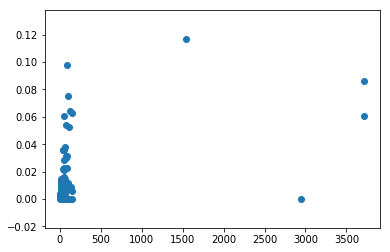

In [423]:
plt.scatter(a['item_id_each_coupon'], a['item_id_each_coupon_freq'])

In [777]:
mergedFullDataLe.drop(['avg_cust_price_cat'], axis = 1, inplace = True)

In [664]:
mergedFullDataLe.head()

id  campaign_id  coupon_id  customer_id  redemption_status  \
0   1           13         27         1053                  0   
1   2           13        116           48                  0   
2   6            9        635          205                  0   
3   7           13        644         1050                  0   
4   9            8       1017         1489                  0   

   active_days_num  start_date_day  start_date_month  start_date_year  \
0               47              19                 5             2013   
1               47              19                 5             2013   
2               32              11                 3             2013   
3               47              19                 5             2013   
4               48              16                 2             2013   

   start_date_weekDay  ...  tot_quantity  avg_selling_price  \
0                   6  ...          43.0         228.235417   
1                   6  ...          72.0          95.435789   
2                   0  ...         137.0         144.319126   
3                   6  ...           7.0         199.775714   
4                   5  ...          27.0          97.016364   

   avg_other_discount  avg_coupon_discount  avg_cust_price  \
0          -54.483750             0.000000      168.267708   
1          -24.721404            -0.781053       59.703538   
2          -20.570097            -0.760777       97.028989   
3          -21.522857             0.000000      178.252857   
4          -10.249545            -0.566818       74.316136   

   customer_demographic_null  customer_transaction_null  campaign_type_X  \
0                          0                          0                1   
1                          0                          0                1   
2                          0                          0                0   
3                          1                          0                1   
4                          0                          0                1   

   campaign_type_Y  start_date_day_freq  
0                0             0.006031  
1                0             0.006031  
2                1             0.007356  
3                0             0.006031  
4                0             0.008684  

[5 rows x 61 columns]

In [424]:
mergedFullDataLe['item_id_each_coupon_freq'].head()

0         NaN
1    0.001913
2    0.000000
3    0.002451
4    0.010606
Name: item_id_each_coupon_freq, dtype: float64

In [425]:
partialTrainData = mergedFullDataLe[~mergedFullDataLe['campaign_id'].isin([9,10,11,12,13])]
partialValidateData = mergedFullDataLe[mergedFullDataLe['campaign_id'].isin([9,10,11,12,13])]
partialTrainData['item_id_each_coupon_freq'].mean()

0.007356170399649221

In [426]:
mergedFullDataLe['item_id_each_coupon_freq'].fillna(partialTrainData['item_id_each_coupon_freq'].mean(), inplace=True)

In [319]:
mergedFullDataLe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 63 columns):
id                                 78369 non-null int64
campaign_id                        78369 non-null int64
coupon_id                          78369 non-null int64
customer_id                        78369 non-null int64
redemption_status                  78369 non-null int64
active_days_num                    78369 non-null int64
start_date_day                     78369 non-null int64
start_date_month                   78369 non-null int64
start_date_year                    78369 non-null int64
start_date_weekDay                 78369 non-null int64
start_date_week                    78369 non-null int64
start_date_week_month              78369 non-null int64
end_date_day                       78369 non-null int64
end_date_month                     78369 non-null int64
end_date_year                      78369 non-null int64
end_date_weekDay                   78369 non-null i

In [778]:
rbs = RobustScaler()
BayesTrainX = rbs.fit_transform(partialTrainData.drop(['redemption_status', 'id', 'customer_id','no_of_adults','age_range',
                            'no_of_children','income_bracket'], axis = 1))
BayesTrainY = partialTrainData['redemption_status']

BayesTestX = rbs.transform(partialValidateData.drop(['redemption_status', 'id', 'customer_id','no_of_adults','age_range',
                            'no_of_children','income_bracket'], axis = 1))
BayesTestY = partialValidateData['redemption_status']

In [779]:
# Parameter Tuning using Bayesian Optimisation


from bayes_opt import BayesianOptimization
def lgbROC_AUC(max_depth,n_estimators, min_data_in_leaf, learning_rate, min_sum_hessian_in_leaf, num_leaves):
#     cv = StratifiedKFold(Y, n_folds=8,shuffle=True, random_state=30)
    
    lgb1 = lightgbm.LGBMClassifier(max_depth=int(max_depth),n_estimators=int(n_estimators), 
                                   min_data_in_leaf=int(min_data_in_leaf), learning_rate=float(learning_rate),
                                  min_sum_hessian_in_leaf=int(min_sum_hessian_in_leaf),
                                  num_leaves=int(num_leaves))
#                                              num_leaves=int(num_leaves),reg_alpha=reg_alpha,
#                                            reg_lambda=reg_lambda)
    lgb1.fit(BayesTrainX, BayesTrainY)
    return roc_auc_score(BayesTestY, lgb1.predict_proba(BayesTestX)[:,1])

rndBO = BayesianOptimization(lgbROC_AUC,{'max_depth': (2, 30),'n_estimators': (10, 5000), 'min_data_in_leaf': (20, 200),
                                        'learning_rate': (0.0009,0.00705919212825226), 'min_sum_hessian_in_leaf': (1,20),
                                        'num_leaves': (10,100)})

rndBO.maximize()
print('-'*53)
print('Final Results')
print('XGBOOST: %f' % rndBO.res['max']['max_val'])

# |   iter    |  target   | learni... | max_depth | min_da... | min_su... | n_esti... | num_le... |
# |  19       |  0.8743   |  0.007059 |  2.0      |  20.0     |  20.0     |  3.172e+0 |  10.0     |

|   iter    |  target   | learni... | max_depth | min_da... | min_su... | n_esti... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  0.8932   |  0.005012 |  19.09    |  49.63    |  8.951    |  2.935e+0 |  64.34    |
|  2        |  0.9054   |  0.004325 |  3.698    |  85.08    |  12.89    |  3.444e+0 |  29.24    |
|  3        |  0.9021   |  0.002806 |  13.31    |  114.7    |  10.84    |  2.429e+0 |  28.16    |
|  4        |  0.8962   |  0.002492 |  6.762    |  70.88    |  14.77    |  4.906e+0 |  46.97    |
|  5        |  0.8996   |  0.004179 |  16.84    |  134.2    |  15.03    |  1.107e+0 |  53.45    |
|  6        |  0.8645   |  0.005617 |  18.78    |  198.2    |  10.62    |  18.21    |  14.94    |
|  7        |  0.8971   |  0.003266 |  6.571    |  199.6    |  7.174    |  4.037e+0 |  99.38    |
|  8        |  0.8967   |  0.003275 |  29.03    |  199.7    |  15.2     |  4.323e+0 |  14.12    |
|  9        |  0.883

TypeError: list indices must be integers or slices, not str

In [149]:
sorted(list(zip(lgb_clf1.feature_importances_, partialValidateData.drop(['redemption_status', 'id','customer_id'],
                                               axis = 1).columns)), key=lambda x: x[0])

[(0.0, 'category_Bakery'),
 (0.0, 'category_Flowers & Plants'),
 (0.0, 'category_Garden'),
 (0.0, 'category_Restauarant'),
 (0.0, 'category_Salads'),
 (0.0, 'category_Travel'),
 (0.0, 'category_Vegetables (cut)'),
 (0.0, 'customer_transaction_null'),
 (0.4609139859676361, 'end_date_year'),
 (2.057159900665283, 'end_date_weekDay'),
 (11.504729986190796, 'category_Skin & Hair Care'),
 (25.151920199394226, 'start_date_year'),
 (26.30805015563965, 'category_Miscellaneous'),
 (34.22104024887085, 'category_Meat'),
 (45.761371076107025, 'end_date_week_month'),
 (48.659364342689514, 'brand_type_each_coupon'),
 (51.86138494312763, 'no_of_children_null'),
 (59.579043209552765, 'category_Dairy, Juices & Snacks'),
 (63.230960726737976, 'category_each_coupon'),
 (63.9974662065506, 'category_Prepared Food'),
 (71.3181277513504, 'no_of_adults'),
 (72.78182983398438, 'rented'),
 (95.42633056640625, 'category_Seafood'),
 (117.51427686214447, 'campaign_type_Y'),
 (174.17981606721878, 'end_date_month'),


In [161]:
from matplotlib import pyplot as plt

In [164]:
[(i,j) for (i,j) in enumerate(partialValidateData.drop(['redemption_status', 'id','customer_id'],
                                               axis = 1))]

[(0, 'campaign_id'),
 (1, 'coupon_id'),
 (2, 'active_days_num'),
 (3, 'start_date_day'),
 (4, 'start_date_month'),
 (5, 'start_date_year'),
 (6, 'start_date_weekDay'),
 (7, 'start_date_week'),
 (8, 'start_date_week_month'),
 (9, 'end_date_day'),
 (10, 'end_date_month'),
 (11, 'end_date_year'),
 (12, 'end_date_weekDay'),
 (13, 'end_date_week'),
 (14, 'end_date_week_month'),
 (15, 'brand_type_Established'),
 (16, 'brand_type_Local'),
 (17, 'category_Bakery'),
 (18, 'category_Dairy, Juices & Snacks'),
 (19, 'category_Flowers & Plants'),
 (20, 'category_Garden'),
 (21, 'category_Grocery'),
 (22, 'category_Meat'),
 (23, 'category_Miscellaneous'),
 (24, 'category_Natural Products'),
 (25, 'category_Packaged Meat'),
 (26, 'category_Pharmaceutical'),
 (27, 'category_Prepared Food'),
 (28, 'category_Restauarant'),
 (29, 'category_Salads'),
 (30, 'category_Seafood'),
 (31, 'category_Skin & Hair Care'),
 (32, 'category_Travel'),
 (33, 'category_Vegetables (cut)'),
 (34, 'item_id_each_coupon'),
 (

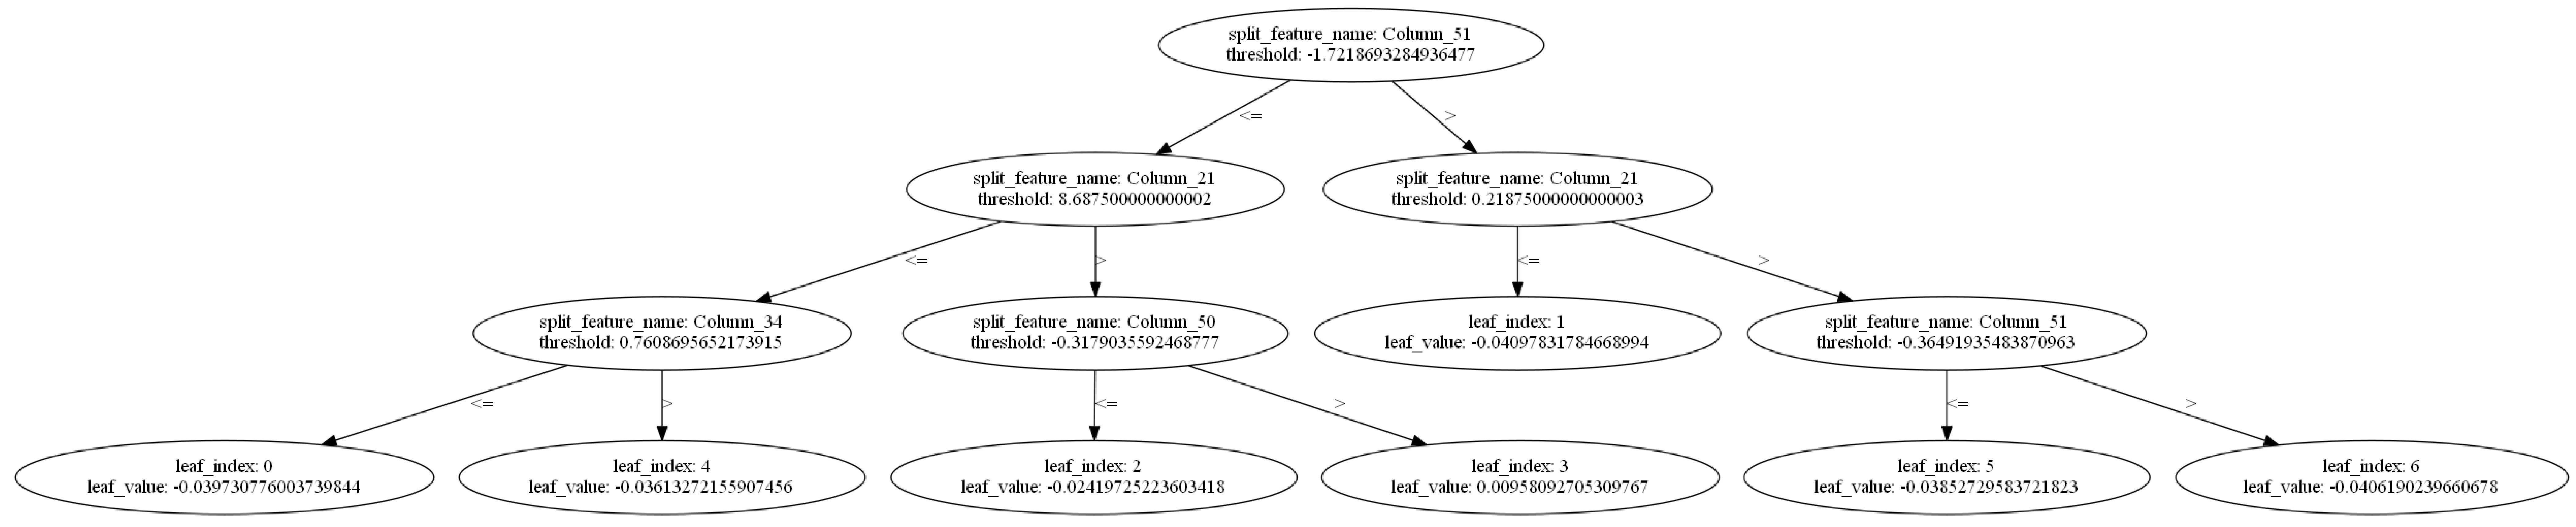

In [169]:
# 15(brand_type_Established) 21(category_Grocery) 51(avg_coupon_discount)
lightgbm.plot_tree(lgb_clf1, figsize=(12,8), tree_index=14)
fig = plt.gcf()
fig.set_size_inches(150, 100)
# fig.savefig('tree2.png')

In [142]:
import catboost

In [150]:
# , cat_features = ['no_of_adults','last_active_interval',
#                 'customer_demographic_null', 'age_range_le', 'family_size_le', 
#                    'no_of_children_le', 'campaign_type_le', 'marital_status_le'

IndentationError: unexpected indent (<ipython-input-150-87e920a90b4d>, line 2)

In [152]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import RobustScaler
rbsFull = RobustScaler()
"""params = {'min_data_in_leaf': 200, 'learning_rate': 0.007059, #'metric': 'binary_logloss', "feature_fraction":0.8,
 #'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 20, #'verbose': 1, 'boost_from_average': False,
 #'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 2, 'num_leaves': 10, 'verbose_eval': True}"""

params = {'learning_rate': 0.02705919212825226,
 'max_depth': 3}
ctb_clf = CatBoostClassifier(**params, n_estimators = 2000,  reg_lambda=0.1)
ctb_clf.fit((partialTrainData.drop(['redemption_status', 'id', 'customer_id' 
                ], axis = 1)), partialTrainData['redemption_status'])
# roc_auc_score()

# 'customer_id', 'campaign_id','item_price',
#                     'start_date_weekDay','active_days_num','age_range_le'
roc_auc_score(partialValidateData['redemption_status'],ctb_clf.predict_proba(
    (partialValidateData.drop(['redemption_status', 'id', 'customer_id'],
                                               axis = 1)))[:,1])

0:	learn: 0.6293344	total: 199ms	remaining: 6m 37s
1:	learn: 0.5714917	total: 277ms	remaining: 4m 36s
2:	learn: 0.5190737	total: 388ms	remaining: 4m 18s
3:	learn: 0.4718388	total: 486ms	remaining: 4m 2s
4:	learn: 0.4287166	total: 578ms	remaining: 3m 50s
5:	learn: 0.3902987	total: 664ms	remaining: 3m 40s
6:	learn: 0.3558538	total: 743ms	remaining: 3m 31s
7:	learn: 0.3244718	total: 823ms	remaining: 3m 24s
8:	learn: 0.2971166	total: 908ms	remaining: 3m 20s
9:	learn: 0.2710249	total: 1.02s	remaining: 3m 23s
10:	learn: 0.2493624	total: 1.13s	remaining: 3m 23s
11:	learn: 0.2291142	total: 1.22s	remaining: 3m 21s
12:	learn: 0.2113796	total: 1.32s	remaining: 3m 21s
13:	learn: 0.1944911	total: 1.42s	remaining: 3m 21s
14:	learn: 0.1805849	total: 1.51s	remaining: 3m 19s
15:	learn: 0.1679769	total: 1.69s	remaining: 3m 30s
16:	learn: 0.1561804	total: 1.77s	remaining: 3m 26s
17:	learn: 0.1459799	total: 1.85s	remaining: 3m 24s
18:	learn: 0.1368877	total: 1.94s	remaining: 3m 21s
19:	learn: 0.1281747	to

161:	learn: 0.0341879	total: 14.5s	remaining: 2m 44s
162:	learn: 0.0341760	total: 14.6s	remaining: 2m 44s
163:	learn: 0.0341619	total: 14.6s	remaining: 2m 43s
164:	learn: 0.0341249	total: 14.7s	remaining: 2m 43s
165:	learn: 0.0340791	total: 14.8s	remaining: 2m 43s
166:	learn: 0.0340653	total: 14.9s	remaining: 2m 43s
167:	learn: 0.0340250	total: 15s	remaining: 2m 43s
168:	learn: 0.0339985	total: 15.1s	remaining: 2m 43s
169:	learn: 0.0339828	total: 15.2s	remaining: 2m 43s
170:	learn: 0.0339708	total: 15.3s	remaining: 2m 43s
171:	learn: 0.0339528	total: 15.4s	remaining: 2m 43s
172:	learn: 0.0339353	total: 15.4s	remaining: 2m 43s
173:	learn: 0.0339199	total: 15.5s	remaining: 2m 42s
174:	learn: 0.0339132	total: 15.6s	remaining: 2m 42s
175:	learn: 0.0338933	total: 15.7s	remaining: 2m 42s
176:	learn: 0.0338825	total: 15.8s	remaining: 2m 42s
177:	learn: 0.0338402	total: 15.9s	remaining: 2m 42s
178:	learn: 0.0338094	total: 15.9s	remaining: 2m 42s
179:	learn: 0.0337956	total: 16s	remaining: 2m 4

317:	learn: 0.0321504	total: 27.7s	remaining: 2m 26s
318:	learn: 0.0321461	total: 27.8s	remaining: 2m 26s
319:	learn: 0.0321428	total: 27.9s	remaining: 2m 26s
320:	learn: 0.0321146	total: 28s	remaining: 2m 26s
321:	learn: 0.0320982	total: 28.1s	remaining: 2m 26s
322:	learn: 0.0320924	total: 28.2s	remaining: 2m 26s
323:	learn: 0.0320847	total: 28.2s	remaining: 2m 26s
324:	learn: 0.0320799	total: 28.3s	remaining: 2m 26s
325:	learn: 0.0320669	total: 28.4s	remaining: 2m 25s
326:	learn: 0.0320565	total: 28.5s	remaining: 2m 25s
327:	learn: 0.0320554	total: 28.6s	remaining: 2m 25s
328:	learn: 0.0320529	total: 28.6s	remaining: 2m 25s
329:	learn: 0.0320433	total: 28.7s	remaining: 2m 25s
330:	learn: 0.0320202	total: 28.8s	remaining: 2m 25s
331:	learn: 0.0320151	total: 28.9s	remaining: 2m 25s
332:	learn: 0.0320117	total: 29s	remaining: 2m 25s
333:	learn: 0.0320098	total: 29.1s	remaining: 2m 24s
334:	learn: 0.0319980	total: 29.1s	remaining: 2m 24s
335:	learn: 0.0319932	total: 29.2s	remaining: 2m 2

473:	learn: 0.0309760	total: 40.9s	remaining: 2m 11s
474:	learn: 0.0309702	total: 40.9s	remaining: 2m 11s
475:	learn: 0.0309627	total: 41s	remaining: 2m 11s
476:	learn: 0.0309587	total: 41.1s	remaining: 2m 11s
477:	learn: 0.0309540	total: 41.2s	remaining: 2m 11s
478:	learn: 0.0309524	total: 41.3s	remaining: 2m 11s
479:	learn: 0.0309496	total: 41.4s	remaining: 2m 11s
480:	learn: 0.0309445	total: 41.5s	remaining: 2m 10s
481:	learn: 0.0309368	total: 41.5s	remaining: 2m 10s
482:	learn: 0.0309305	total: 41.6s	remaining: 2m 10s
483:	learn: 0.0309270	total: 41.7s	remaining: 2m 10s
484:	learn: 0.0309125	total: 41.8s	remaining: 2m 10s
485:	learn: 0.0309070	total: 41.9s	remaining: 2m 10s
486:	learn: 0.0309030	total: 42s	remaining: 2m 10s
487:	learn: 0.0308989	total: 42.1s	remaining: 2m 10s
488:	learn: 0.0308976	total: 42.1s	remaining: 2m 10s
489:	learn: 0.0308908	total: 42.2s	remaining: 2m 10s
490:	learn: 0.0308862	total: 42.3s	remaining: 2m 10s
491:	learn: 0.0308757	total: 42.4s	remaining: 2m 9

633:	learn: 0.0302108	total: 54.5s	remaining: 1m 57s
634:	learn: 0.0302068	total: 54.5s	remaining: 1m 57s
635:	learn: 0.0302043	total: 54.6s	remaining: 1m 57s
636:	learn: 0.0302026	total: 54.7s	remaining: 1m 57s
637:	learn: 0.0301993	total: 54.8s	remaining: 1m 56s
638:	learn: 0.0301967	total: 54.9s	remaining: 1m 56s
639:	learn: 0.0301958	total: 55s	remaining: 1m 56s
640:	learn: 0.0301934	total: 55.1s	remaining: 1m 56s
641:	learn: 0.0301922	total: 55.1s	remaining: 1m 56s
642:	learn: 0.0301892	total: 55.2s	remaining: 1m 56s
643:	learn: 0.0301865	total: 55.3s	remaining: 1m 56s
644:	learn: 0.0301827	total: 55.4s	remaining: 1m 56s
645:	learn: 0.0301802	total: 55.5s	remaining: 1m 56s
646:	learn: 0.0301729	total: 55.5s	remaining: 1m 56s
647:	learn: 0.0301659	total: 55.6s	remaining: 1m 56s
648:	learn: 0.0301613	total: 55.7s	remaining: 1m 56s
649:	learn: 0.0301600	total: 55.8s	remaining: 1m 55s
650:	learn: 0.0301558	total: 55.9s	remaining: 1m 55s
651:	learn: 0.0301469	total: 56s	remaining: 1m 5

789:	learn: 0.0296580	total: 1m 7s	remaining: 1m 43s
790:	learn: 0.0296100	total: 1m 7s	remaining: 1m 43s
791:	learn: 0.0296068	total: 1m 7s	remaining: 1m 43s
792:	learn: 0.0296061	total: 1m 7s	remaining: 1m 43s
793:	learn: 0.0296021	total: 1m 8s	remaining: 1m 43s
794:	learn: 0.0296015	total: 1m 8s	remaining: 1m 43s
795:	learn: 0.0295989	total: 1m 8s	remaining: 1m 43s
796:	learn: 0.0295943	total: 1m 8s	remaining: 1m 43s
797:	learn: 0.0295904	total: 1m 8s	remaining: 1m 42s
798:	learn: 0.0295855	total: 1m 8s	remaining: 1m 42s
799:	learn: 0.0295828	total: 1m 8s	remaining: 1m 42s
800:	learn: 0.0295788	total: 1m 8s	remaining: 1m 42s
801:	learn: 0.0295723	total: 1m 8s	remaining: 1m 42s
802:	learn: 0.0295637	total: 1m 8s	remaining: 1m 42s
803:	learn: 0.0295623	total: 1m 8s	remaining: 1m 42s
804:	learn: 0.0295606	total: 1m 8s	remaining: 1m 42s
805:	learn: 0.0295578	total: 1m 9s	remaining: 1m 42s
806:	learn: 0.0295535	total: 1m 9s	remaining: 1m 42s
807:	learn: 0.0295461	total: 1m 9s	remaining: 

942:	learn: 0.0291374	total: 1m 20s	remaining: 1m 30s
943:	learn: 0.0291344	total: 1m 20s	remaining: 1m 30s
944:	learn: 0.0291240	total: 1m 20s	remaining: 1m 29s
945:	learn: 0.0291234	total: 1m 20s	remaining: 1m 29s
946:	learn: 0.0291179	total: 1m 20s	remaining: 1m 29s
947:	learn: 0.0291160	total: 1m 20s	remaining: 1m 29s
948:	learn: 0.0291153	total: 1m 20s	remaining: 1m 29s
949:	learn: 0.0291150	total: 1m 20s	remaining: 1m 29s
950:	learn: 0.0291123	total: 1m 21s	remaining: 1m 29s
951:	learn: 0.0291108	total: 1m 21s	remaining: 1m 29s
952:	learn: 0.0291083	total: 1m 21s	remaining: 1m 29s
953:	learn: 0.0291061	total: 1m 21s	remaining: 1m 29s
954:	learn: 0.0291029	total: 1m 21s	remaining: 1m 29s
955:	learn: 0.0290963	total: 1m 21s	remaining: 1m 28s
956:	learn: 0.0290934	total: 1m 21s	remaining: 1m 28s
957:	learn: 0.0290916	total: 1m 21s	remaining: 1m 28s
958:	learn: 0.0290872	total: 1m 21s	remaining: 1m 28s
959:	learn: 0.0290865	total: 1m 21s	remaining: 1m 28s
960:	learn: 0.0290858	total:

1093:	learn: 0.0287463	total: 1m 33s	remaining: 1m 17s
1094:	learn: 0.0287435	total: 1m 33s	remaining: 1m 17s
1095:	learn: 0.0287409	total: 1m 33s	remaining: 1m 16s
1096:	learn: 0.0287402	total: 1m 33s	remaining: 1m 16s
1097:	learn: 0.0287378	total: 1m 33s	remaining: 1m 16s
1098:	learn: 0.0287367	total: 1m 33s	remaining: 1m 16s
1099:	learn: 0.0287358	total: 1m 33s	remaining: 1m 16s
1100:	learn: 0.0287343	total: 1m 33s	remaining: 1m 16s
1101:	learn: 0.0287297	total: 1m 33s	remaining: 1m 16s
1102:	learn: 0.0287253	total: 1m 33s	remaining: 1m 16s
1103:	learn: 0.0287197	total: 1m 33s	remaining: 1m 16s
1104:	learn: 0.0287195	total: 1m 34s	remaining: 1m 16s
1105:	learn: 0.0287100	total: 1m 34s	remaining: 1m 16s
1106:	learn: 0.0287087	total: 1m 34s	remaining: 1m 16s
1107:	learn: 0.0287044	total: 1m 34s	remaining: 1m 15s
1108:	learn: 0.0287039	total: 1m 34s	remaining: 1m 15s
1109:	learn: 0.0287035	total: 1m 34s	remaining: 1m 15s
1110:	learn: 0.0287025	total: 1m 34s	remaining: 1m 15s
1111:	lear

1246:	learn: 0.0283409	total: 1m 45s	remaining: 1m 3s
1247:	learn: 0.0283408	total: 1m 45s	remaining: 1m 3s
1248:	learn: 0.0283404	total: 1m 45s	remaining: 1m 3s
1249:	learn: 0.0283359	total: 1m 46s	remaining: 1m 3s
1250:	learn: 0.0283328	total: 1m 46s	remaining: 1m 3s
1251:	learn: 0.0283319	total: 1m 46s	remaining: 1m 3s
1252:	learn: 0.0283297	total: 1m 46s	remaining: 1m 3s
1253:	learn: 0.0283288	total: 1m 46s	remaining: 1m 3s
1254:	learn: 0.0283274	total: 1m 46s	remaining: 1m 3s
1255:	learn: 0.0283254	total: 1m 46s	remaining: 1m 3s
1256:	learn: 0.0283248	total: 1m 46s	remaining: 1m 3s
1257:	learn: 0.0283236	total: 1m 46s	remaining: 1m 2s
1258:	learn: 0.0283187	total: 1m 46s	remaining: 1m 2s
1259:	learn: 0.0283167	total: 1m 46s	remaining: 1m 2s
1260:	learn: 0.0283131	total: 1m 46s	remaining: 1m 2s
1261:	learn: 0.0283123	total: 1m 47s	remaining: 1m 2s
1262:	learn: 0.0283083	total: 1m 47s	remaining: 1m 2s
1263:	learn: 0.0283064	total: 1m 47s	remaining: 1m 2s
1264:	learn: 0.0283056	total

1399:	learn: 0.0280433	total: 1m 58s	remaining: 50.8s
1400:	learn: 0.0280414	total: 1m 58s	remaining: 50.7s
1401:	learn: 0.0280403	total: 1m 58s	remaining: 50.6s
1402:	learn: 0.0280353	total: 1m 58s	remaining: 50.5s
1403:	learn: 0.0280346	total: 1m 58s	remaining: 50.4s
1404:	learn: 0.0280344	total: 1m 58s	remaining: 50.4s
1405:	learn: 0.0280329	total: 1m 59s	remaining: 50.3s
1406:	learn: 0.0280318	total: 1m 59s	remaining: 50.2s
1407:	learn: 0.0280283	total: 1m 59s	remaining: 50.1s
1408:	learn: 0.0280273	total: 1m 59s	remaining: 50s
1409:	learn: 0.0280272	total: 1m 59s	remaining: 49.9s
1410:	learn: 0.0280267	total: 1m 59s	remaining: 49.8s
1411:	learn: 0.0280265	total: 1m 59s	remaining: 49.8s
1412:	learn: 0.0280264	total: 1m 59s	remaining: 49.7s
1413:	learn: 0.0280258	total: 1m 59s	remaining: 49.6s
1414:	learn: 0.0280249	total: 1m 59s	remaining: 49.5s
1415:	learn: 0.0280222	total: 1m 59s	remaining: 49.4s
1416:	learn: 0.0280219	total: 1m 59s	remaining: 49.3s
1417:	learn: 0.0280187	total: 

1557:	learn: 0.0277142	total: 2m 11s	remaining: 37.4s
1558:	learn: 0.0277137	total: 2m 11s	remaining: 37.3s
1559:	learn: 0.0277137	total: 2m 11s	remaining: 37.2s
1560:	learn: 0.0277133	total: 2m 12s	remaining: 37.1s
1561:	learn: 0.0277126	total: 2m 12s	remaining: 37.1s
1562:	learn: 0.0277116	total: 2m 12s	remaining: 37s
1563:	learn: 0.0277092	total: 2m 12s	remaining: 36.9s
1564:	learn: 0.0277039	total: 2m 12s	remaining: 36.8s
1565:	learn: 0.0277006	total: 2m 12s	remaining: 36.7s
1566:	learn: 0.0276962	total: 2m 12s	remaining: 36.6s
1567:	learn: 0.0276958	total: 2m 12s	remaining: 36.5s
1568:	learn: 0.0276953	total: 2m 12s	remaining: 36.5s
1569:	learn: 0.0276942	total: 2m 12s	remaining: 36.4s
1570:	learn: 0.0276930	total: 2m 12s	remaining: 36.3s
1571:	learn: 0.0276908	total: 2m 12s	remaining: 36.2s
1572:	learn: 0.0276899	total: 2m 13s	remaining: 36.1s
1573:	learn: 0.0276894	total: 2m 13s	remaining: 36s
1574:	learn: 0.0276886	total: 2m 13s	remaining: 36s
1575:	learn: 0.0276880	total: 2m 1

1710:	learn: 0.0274156	total: 2m 24s	remaining: 24.4s
1711:	learn: 0.0274137	total: 2m 24s	remaining: 24.3s
1712:	learn: 0.0274130	total: 2m 24s	remaining: 24.2s
1713:	learn: 0.0274100	total: 2m 24s	remaining: 24.1s
1714:	learn: 0.0274058	total: 2m 24s	remaining: 24.1s
1715:	learn: 0.0274049	total: 2m 24s	remaining: 24s
1716:	learn: 0.0274007	total: 2m 24s	remaining: 23.9s
1717:	learn: 0.0273997	total: 2m 25s	remaining: 23.8s
1718:	learn: 0.0273987	total: 2m 25s	remaining: 23.7s
1719:	learn: 0.0273984	total: 2m 25s	remaining: 23.6s
1720:	learn: 0.0273957	total: 2m 25s	remaining: 23.6s
1721:	learn: 0.0273953	total: 2m 25s	remaining: 23.5s
1722:	learn: 0.0273914	total: 2m 25s	remaining: 23.4s
1723:	learn: 0.0273910	total: 2m 25s	remaining: 23.3s
1724:	learn: 0.0273904	total: 2m 25s	remaining: 23.2s
1725:	learn: 0.0273877	total: 2m 25s	remaining: 23.1s
1726:	learn: 0.0273861	total: 2m 25s	remaining: 23s
1727:	learn: 0.0273847	total: 2m 25s	remaining: 23s
1728:	learn: 0.0273816	total: 2m 2

1863:	learn: 0.0271564	total: 2m 37s	remaining: 11.5s
1864:	learn: 0.0271553	total: 2m 37s	remaining: 11.4s
1865:	learn: 0.0271538	total: 2m 37s	remaining: 11.3s
1866:	learn: 0.0271535	total: 2m 37s	remaining: 11.2s
1867:	learn: 0.0271533	total: 2m 37s	remaining: 11.1s
1868:	learn: 0.0271405	total: 2m 37s	remaining: 11s
1869:	learn: 0.0271375	total: 2m 37s	remaining: 11s
1870:	learn: 0.0271354	total: 2m 37s	remaining: 10.9s
1871:	learn: 0.0271340	total: 2m 37s	remaining: 10.8s
1872:	learn: 0.0271327	total: 2m 37s	remaining: 10.7s
1873:	learn: 0.0271320	total: 2m 37s	remaining: 10.6s
1874:	learn: 0.0271265	total: 2m 37s	remaining: 10.5s
1875:	learn: 0.0271256	total: 2m 38s	remaining: 10.4s
1876:	learn: 0.0271239	total: 2m 38s	remaining: 10.4s
1877:	learn: 0.0271238	total: 2m 38s	remaining: 10.3s
1878:	learn: 0.0271216	total: 2m 38s	remaining: 10.2s
1879:	learn: 0.0271214	total: 2m 38s	remaining: 10.1s
1880:	learn: 0.0271210	total: 2m 38s	remaining: 10s
1881:	learn: 0.0271206	total: 2m 3

0.834346748944981

### Full Data

In [1024]:
# tran=tran.merge(coup_item,on='item_id',how='left')
customer_transaction_useful_item_data = customer_transaction_useful_item_data.merge(coupon_item_mapping,on='item_id',how="left")

In [1025]:

customer_transaction_useful_item_data=customer_transaction_useful_item_data.merge(customer_transaction_useful_item_data.groupby(['customer_id','coupon_id']).agg({'item_id':'count',
            }).reset_index(),on=['customer_id','coupon_id'],how='left')
customer_transaction_useful_item_data.sample(10)

date  customer_id  item_id_x  quantity  selling_price  other_discount  coupon_discount  item_price  coupon_id  item_id_y
1536973 2013-02-22           28      22627         1          42.39           -3.56              0.0      38.830        349         29
1360587 2013-01-13         1518      51374         2        1139.13         -270.71              0.0     434.210         32        104
442551  2012-06-19         1066      47695         1          70.88            0.00              0.0      70.880          7         42
1022742 2012-11-02          574      12122         1          71.24            0.00              0.0      71.240          8         20
420381  2012-06-14         1044      49504         2          70.53            0.00              0.0      35.265          7        118
531115  2012-07-12         1004      18118         2         163.14           -7.12              0.0      78.010        492         10
2034432 2013-06-17         1239      21685         2         127.52          -21.37              0.0      53.075          6        218
1503365 2013-02-16          819      27608         1          68.39            0.00              0.0      68.390        104          7
261022  2012-05-06          260      45556         1         117.19            0.00              0.0     117.190         23         27
756372  2012-09-02          303      19442         1          74.45            0.00              0.0      74.450          9        125

In [1026]:
customer_transaction_useful_item_data_partial2 = customer_transaction_useful_item_data #[(customer_transaction_useful_item_data['date'] > '2013-01-01')]
 
customer_transaction_useful_item_data_partial2['item_price'] = ((customer_transaction_useful_item_data_partial2['selling_price'] + 
customer_transaction_useful_item_data_partial2['other_discount'] +customer_transaction_useful_item_data_partial2['coupon_discount'] ) / customer_transaction_useful_item_data_partial2['quantity']).astype('float')


customer_segment_data2 = customer_transaction_useful_item_data_partial2.groupby(['customer_id']).agg({'item_id':pd.Series.nunique, 'quantity':'sum',
        'selling_price':'mean','other_discount':'mean','coupon_discount':'mean','item_price':'mean'}).reset_index()

customer_segment_data2.columns = ['customer_id','num_item_id','tot_quantity','avg_selling_price','avg_other_discount',
                                 'avg_coupon_discount','avg_cust_price']

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


KeyError: 'item_id'

In [1027]:
trainTest = pd.concat([trainData, testData], axis = 0, sort=False)

mergedFullData2 = pd.merge(pd.merge(pd.merge(pd.merge(trainTest, campaign_data_out, on='campaign_id', how='left'), 
                coupon_item_merged_group_full, on="coupon_id", how = "left"), customer_demographics_out, 
                on='customer_id', how = 'left'), customer_segment_data2, on='customer_id', how='left')

mergedFullData2['customer_demographic_null'] = mergedFullData2['family_size'].isna().apply(lambda x: 1 if x is True else 0)
mergedFullData2['customer_transaction_null'] = mergedFullData2['avg_cust_price'].isna().apply(lambda x: 1 if x is True else 0)

mergedFullData2['marital_status_null'].fillna(1, inplace=True)
mergedFullData2['no_of_children_null'].fillna(1, inplace=True)

mergedFullData2['no_of_adults'].fillna(mergedFullData2['no_of_adults'].mode().values[0], inplace=True)
mergedFullData2['age_range'].fillna(mergedFullData2['age_range'].mode().values[0], inplace=True)
mergedFullData2['marital_status'].fillna(mergedFullData2['marital_status'].mode().values[0], inplace=True)
mergedFullData2['rented'].fillna(mergedFullData2['rented'].mode().values[0], inplace=True)
mergedFullData2['no_of_children'].fillna(mergedFullData2['no_of_children'].mode().values[0], inplace=True)
mergedFullData2['income_bracket'].fillna(mergedFullData2['income_bracket'].mode().values[0], inplace=True)
mergedFullData2['family_size'].fillna(mergedFullData2['family_size'].mode().values[0], inplace=True)

mergedFullData2['num_item_id'].fillna(0, inplace=True)
mergedFullData2['tot_quantity'].fillna(0, inplace=True)
mergedFullData2['avg_selling_price'].fillna(0, inplace=True)
mergedFullData2['avg_other_discount'].fillna(0, inplace=True)
mergedFullData2['avg_coupon_discount'].fillna(0, inplace=True)
mergedFullData2['avg_cust_price'].fillna(0, inplace=True)


mergedFullDataLe2 = pd.get_dummies(mergedFullData2.drop(['start_date', 'end_date'], axis = 1))

In [1028]:
actualTrainData = mergedFullDataLe2.iloc[:trainData.shape[0],:]
actualTestData = mergedFullDataLe2.iloc[trainData.shape[0]:,:]

In [1029]:
mergedFullDataLe2.shape, actualTestData.shape, actualTrainData.shape

((128595, 60), (50226, 60), (78369, 60))

In [1030]:
mergedFullDataLe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128595 entries, 0 to 128594
Data columns (total 60 columns):
id                                 128595 non-null int64
campaign_id                        128595 non-null int64
coupon_id                          128595 non-null int64
customer_id                        128595 non-null int64
redemption_status                  78369 non-null float64
active_days_num                    128595 non-null int64
start_date_day                     128595 non-null int64
start_date_month                   128595 non-null int64
start_date_year                    128595 non-null int64
start_date_weekDay                 128595 non-null int64
start_date_week                    128595 non-null int64
start_date_week_month              128595 non-null int64
end_date_day                       128595 non-null int64
end_date_month                     128595 non-null int64
end_date_year                      128595 non-null int64
end_date_weekDay                 

In [687]:
mergedFullDataLe2['avg_cust_price_cat'] = mergedFullDataLe2['avg_cust_price'] //5

In [679]:
# 15(brand_type_Established) 21(category_Grocery) 51(avg_coupon_discount)
#'no_of_adults', 'last_active_interval', 'customer_demographic_null', 'age_range_le', 'family_size_le', 'no_of_children_le', 
#'campaign_type_le', 'marital_status_le', 'active_days_num_freq', 'income_bracket_freq', 'age_range_le_freq', 'item_price_cat

# Used # no_of_adults_freq	age_range_freq	no_of_children_freq	avg_cust_price_cat	income_bracket_freq	start_date_day_freq

a = actualTrainData.groupby('family_size').agg({"redemption_status": 'mean'}).reset_index()
a.columns = ['family_size', 'family_size_freq']
mergedFullDataLe2 = pd.merge(mergedFullDataLe2, a, on = 'family_size', how="left")

actualTrainData = mergedFullDataLe2.iloc[:trainData.shape[0],:]
actualTestData = mergedFullDataLe2.iloc[trainData.shape[0]:,:]

mergedFullDataLe2['family_size_freq'].fillna(actualTrainData['family_size_freq'].mean(), inplace=True)

In [789]:
rbsFull2 = RobustScaler()

params = {'min_data_in_leaf': 35, 'learning_rate': 0.00705919212825226, 'metric': 'binary_logloss', "feature_fraction":0.8,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 3, 'num_leaves': 17, 'verbose_eval': True}

lgb_clf2 = LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
lgb_clf2.fit(rbsFull2.fit_transform(actualTrainData.drop(['redemption_status', 'id', 'customer_id',
                                                         ], axis = 1)), actualTrainData['redemption_status'])

# roc_auc_score()
# roc_auc_score(partialValidateData['redemption_status'],lgb_clf1.predict_proba(
#     rbsFull.transform(partialValidateData.drop(['redemption_status', 'id','customer_id'],
#                                                axis = 1)))[:,1])

LGBMClassifier(bagging_fraction=0.8, bagging_freq=11, boost_from_average=False,
               boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.13358144268185645, feature_fraction=0.8,
               importance_type='gain', lambda=0.1,
               learning_rate=0.00705919212825226, max_depth=3,
               metric='binary_logloss', min_child_samples=20,
               min_child_weight=0.001, min_data_in_leaf=35, min_split_gain=0.0,
               min_sum_hessian_in_leaf=1, n_estimators=2000, n_jobs=-1,
               nthread=4, num_leaves=17, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.9920028820065904, subsample_for_bin=200000,
               subsample_freq=0, verbose=1, ...)

In [790]:
preds6 = lgb_clf2.predict_proba(rbsFull2.transform(actualTestData.drop(['redemption_status', 'id', 'customer_id'],
                                                             axis = 1)))[:,1]
print(preds6.sum())
actualTestData['redemption_status'] = preds6
actualTestData[['id','redemption_status']].to_csv('SubmissionLelgbm_newData6_90.csv', index=False)

470.3666241007046


c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [690]:
preds4.sum()

457.1355164586992

### Ensemble on over 85

In [913]:
pred1 = pd.read_csv('over87/747_730751_us_SubmissionLelgbm_newD_14VAO6q.csv')
pred2 = pd.read_csv('over87/747_730751_us_SubmissionLelgbm_newD_3sLkeyB (1).csv')
pred3 = pd.read_csv('over87/747_730751_us_SubmissionLelgbm_newD_nGkEeRK.csv')
pred4 = pd.read_csv('over87/747_730751_us_SubmissionLelgbm_newData4 (1).csv')
pred5 = pd.read_csv('over87/747_730751_us_SubmissionLelgbm_newData5 (1).csv')
pred6 = pd.read_csv('over87/747_730751_us_SubmissionLelgbm_newData6_90 (1).csv')
# pred7 = pd.read_csv('over85/747_730751_us_SubmissionLeLGBMCV_up_kM89J9l (2).csv')
# pred8 = pd.read_csv('over85/747_730751_us_SubmissionLelgbm_newData4.csv')
# pred9 = pd.read_csv('over85/747_730751_us_SubmissionLelgbm_newData5.csv')
# pred10 = pd.read_csv('over85/747_730751_us_SubmissionLelgbm_newData6_90.csv')

# pred11 = pd.read_csv('over85/747_730751_us_SubmissionLelgbm.csv')
# pred12 = pd.read_csv('over85/747_730751_us_SubmissionLelgbm2.csv')
# pred13 = pd.read_csv('over85/747_730751_us_SubmissionLelgbm_newD_14VAO6q.csv')
# pred14 = pd.read_csv('over85/747_730751_us_SubmissionLelgbm_newData3.csv')
# pred15 = pd.read_csv('over85/747_730751_us_SubmissionLeLGBMCV (1).csv')
# pred16 = pd.read_csv('over85/747_730751_us_SubmissionLeLGBMCV_cu_oKMa7Pf (1).csv')
# pred17 = pd.read_csv('over85/747_730751_us_SubmissionLeLGBMCV_updated (1).csv')
# pred18 = pd.read_csv('over85/747_730751_us_SubmissionLeXGBCV2 (1).csv')
# pred19 = pd.read_csv('over85/747_730751_us_SubmissionLeXGBCV2_mN9Vbgr (1).csv')

# pred8 = pd.read_csv('over85/')


In [915]:
pred1.head()

id  redemption_status
0   3           0.055530
1   4           0.002523
2   5           0.030452
3   8           0.004597
4  10           0.001966

In [903]:
pred1.shape

(50226, 2)

In [916]:
final_pred = (pred1['redemption_status'] + pred2['redemption_status'] + pred3['redemption_status'] + pred4['redemption_status'] +
             pred5['redemption_status'] + pred6['redemption_status'] )/6

In [917]:
final_pred.sum()

409.00439813861357

In [918]:
actualTrainData = mergedFullDataLe2.iloc[:trainData.shape[0],:]
actualTestData = mergedFullDataLe2.iloc[trainData.shape[0]:,:]

In [919]:
actualTrainData.shape, actualTestData.shape, mergedFullDataLe2.shape

((78369, 60), (50226, 60), (128595, 60))

In [920]:
actualTestData.shape, final_pred.shape

((50226, 60), (50226,))

In [921]:
outputFile = actualTestData[['id','redemption_status']].reset_index(drop=True)
# outputFile.reset_index

In [922]:
outputFile['redemption_status'] = final_pred

In [923]:
outputFile.head()

id  redemption_status
0   3           0.066164
1   4           0.003072
2   5           0.033033
3   8           0.002749
4  10           0.001083

In [924]:
outputFile[['id','redemption_status']].to_csv('SubmissionLelgbm_newData_Ensemble_44.csv', index=False)

In [527]:
actualTestData['redemption_status'] = final_pred[:]
actualTestData[['id','redemption_status']].to_csv('SubmissionLelgbm_newData_Ensemble.csv', index=False)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [506]:
len(final_pred)

50226

In [508]:
actualTestData.loc[:,'redemption_status'] = final_pred

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [514]:
# actualTrainData = mergedFullDataLe2.iloc[:trainData.shape[0],:]
# actualTestData = mergedFullDataLe2.iloc[trainData.shape[0]:,:]

testData.tail()

50226

In [528]:
actualTestData.head()

id  campaign_id  coupon_id  customer_id  redemption_status  \
78369   3           22        869          967                NaN   
78370   4           20        389         1566                NaN   
78371   5           22        981          510                NaN   
78372   8           25       1069          361                NaN   
78373  10           17        498          811                NaN   

       active_days_num  start_date_day  start_date_month  start_date_year  \
78369               32              16                 9             2013   
78370               70               7                 9             2013   
78371               32              16                 9             2013   
78372               32              21                10             2013   
78373               32              29                 7             2013   

       start_date_weekDay  ...  customer_demographic_null  \
78369                   0  ...                          0   
78370                   5  ...                          0   
78371                   0  ...                          0   
78372                   0  ...                          0   
78373                   0  ...                          1   

       customer_transaction_null  campaign_type_X  campaign_type_Y  \
78369                          0                1                0   
78370                          0                0                1   
78371                          0                1                0   
78372                          0                0                1   
78373                          0                0                1   

       start_date_day_freq  income_bracket_freq  avg_cust_price_cat  \
78369             0.008684             0.008285                17.0   
78370             0.007202             0.015354                16.0   
78371             0.008684             0.010417                 9.0   
78372             0.009302             0.009016                13.0   
78373             0.009302             0.008285                12.0   

       no_of_children_freq  age_range_freq  no_of_adults_freq  
78369             0.008194        0.013292           0.012970  
78370             0.008194        0.013584           0.008409  
78371             0.012232        0.013584           0.012970  
78372             0.008194        0.006107           0.012970  
78373             0.008194        0.007621           0.008409  

[5 rows x 66 columns]

In [501]:
actualTestData['redemption_status'] = final_pred
actualTestData.head()

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


id  campaign_id  coupon_id  customer_id  redemption_status  \
78369   3           22        869          967                NaN   
78370   4           20        389         1566                NaN   
78371   5           22        981          510                NaN   
78372   8           25       1069          361                NaN   
78373  10           17        498          811                NaN   

       active_days_num  start_date_day  start_date_month  start_date_year  \
78369               32              16                 9             2013   
78370               70               7                 9             2013   
78371               32              16                 9             2013   
78372               32              21                10             2013   
78373               32              29                 7             2013   

       start_date_weekDay  ...  customer_demographic_null  \
78369                   0  ...                          0   
78370                   5  ...                          0   
78371                   0  ...                          0   
78372                   0  ...                          0   
78373                   0  ...                          1   

       customer_transaction_null  campaign_type_X  campaign_type_Y  \
78369                          0                1                0   
78370                          0                0                1   
78371                          0                1                0   
78372                          0                0                1   
78373                          0                0                1   

       start_date_day_freq  income_bracket_freq  avg_cust_price_cat  \
78369             0.008684             0.008285                17.0   
78370             0.007202             0.015354                16.0   
78371             0.008684             0.010417                 9.0   
78372             0.009302             0.009016                13.0   
78373             0.009302             0.008285                12.0   

       no_of_children_freq  age_range_freq  no_of_adults_freq  
78369             0.008194        0.013292           0.012970  
78370             0.008194        0.013584           0.008409  
78371             0.012232        0.013584           0.012970  
78372             0.008194        0.006107           0.012970  
78373             0.008194        0.007621           0.008409  

[5 rows x 66 columns]

### mergedData One Hot

In [691]:
mergedFullDataLe2.head()

id  campaign_id  coupon_id  customer_id  redemption_status  \
0   1           13         27         1053                0.0   
1   2           13        116           48                0.0   
2   6            9        635          205                0.0   
3   7           13        644         1050                0.0   
4   9            8       1017         1489                0.0   

   active_days_num  start_date_day  start_date_month  start_date_year  \
0               47              19                 5             2013   
1               47              19                 5             2013   
2               32              11                 3             2013   
3               47              19                 5             2013   
4               48              16                 2             2013   

   start_date_weekDay  ...  tot_quantity  avg_selling_price  \
0                   6  ...         127.0         198.227826   
1                   6  ...         126.0         111.285618   
2                   0  ...         323.0         137.881918   
3                   6  ...          34.0         143.081538   
4                   5  ...         102.0         100.484125   

   avg_other_discount  avg_coupon_discount  avg_cust_price  \
0          -48.535942            -1.290580      135.043684   
1          -32.822360            -0.500225       57.820094   
2          -20.133388            -1.424735       94.815959   
3          -49.484231            -6.850000       86.240385   
4          -17.173750            -0.823750       70.215646   

   customer_demographic_null  customer_transaction_null  campaign_type_X  \
0                          0                          0                1   
1                          0                          0                1   
2                          0                          0                0   
3                          1                          0                1   
4                          0                          0                1   

   campaign_type_Y  avg_cust_price_cat  
0                0                27.0  
1                0                11.0  
2                1                18.0  
3                0                17.0  
4                0                14.0  

[5 rows x 61 columns]

In [875]:
mergedFullData.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'campaign_type', 'start_date', 'end_date', 'active_days_num',
       'start_date_day', 'start_date_month', 'start_date_year',
       'start_date_weekDay', 'start_date_week', 'start_date_week_month',
       'end_date_day', 'end_date_month', 'end_date_year', 'end_date_weekDay',
       'end_date_week', 'end_date_week_month', 'brand_type_Established',
       'brand_type_Local', 'category_Bakery',
       'category_Dairy, Juices & Snacks', 'category_Flowers & Plants',
       'category_Garden', 'category_Grocery', 'category_Meat',
       'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Restauarant', 'category_Salads',
       'category_Seafood', 'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)', 'item_id_each_coupon', 'brand_each_coupon',
       'brand_type_each_coupon', 

In [880]:
mergedFullDataOneHot.shape

(78369, 86)

In [877]:
colToCat  = ['age_range','marital_status', 'rented', 'family_size', 'no_of_children','income_bracket', 'no_of_adults']
for col in colToCat:
    mergedFullData[col] = mergedFullData[col].astype("object")

In [878]:
mergedFullDataOneHot = pd.get_dummies(mergedFullData.drop(['start_date', 'end_date'], axis = 1))

In [879]:
mergedFullDataOneHot.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'active_days_num', 'start_date_day', 'start_date_month',
       'start_date_year', 'start_date_weekDay', 'start_date_week',
       'start_date_week_month', 'end_date_day', 'end_date_month',
       'end_date_year', 'end_date_weekDay', 'end_date_week',
       'end_date_week_month', 'brand_type_Established', 'brand_type_Local',
       'category_Bakery', 'category_Dairy, Juices & Snacks',
       'category_Flowers & Plants', 'category_Garden', 'category_Grocery',
       'category_Meat', 'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Restauarant', 'category_Salads',
       'category_Seafood', 'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)', 'item_id_each_coupon', 'brand_each_coupon',
       'brand_type_each_coupon', 'category_each_coupon', 'marital_status_null',
   

In [ ]:
mergedFullDataOneHot.head

In [1021]:
ddf=mergedFullDataOneHot.merge(mergedFullDataOneHot.groupby(['customer_id','coupon_id']).agg({'start_date_day':'count'
            }).reset_index(),on=['customer_id','coupon_id'],how='left')
ddf.sample(10)

id  campaign_id  coupon_id  customer_id  redemption_status  active_days_num  start_date_day_x  start_date_month  start_date_year  start_date_weekDay  start_date_week  start_date_week_month  end_date_day  end_date_month  end_date_year  end_date_weekDay  end_date_week  end_date_week_month  brand_type_Established  brand_type_Local  category_Bakery  category_Dairy, Juices & Snacks  category_Flowers & Plants  category_Garden  category_Grocery  category_Meat  category_Miscellaneous  category_Natural Products  category_Packaged Meat  category_Pharmaceutical  category_Prepared Food  category_Restauarant  category_Salads  category_Seafood  category_Skin & Hair Care  category_Travel  category_Vegetables (cut)  item_id_each_coupon  brand_each_coupon  brand_type_each_coupon  category_each_coupon  marital_status_null  no_of_children_null  num_item_id  tot_quantity  avg_selling_price  avg_other_discount  avg_coupon_discount  avg_cust_price  customer_demographic_null  customer_transaction_null  campaign_type_X  campaign_type_Y  age_range_0.0  age_range_1.0  age_range_2.0  age_range_3.0  age_range_4.0  age_range_5.0  marital_status_0.0  marital_status_1.0  rented_0.0  rented_1.0  family_size_1.0  family_size_2.0  family_size_3.0  family_size_4.0  family_size_5.0  no_of_children_0.0  no_of_children_1.0  no_of_children_2.0  no_of_children_3.0  income_bracket_1.0  income_bracket_2.0  income_bracket_3.0  income_bracket_4.0  income_bracket_5.0  income_bracket_6.0  income_bracket_7.0  income_bracket_8.0  income_bracket_9.0  income_bracket_10.0  income_bracket_11.0  income_bracket_12.0  no_of_adults_1.0  no_of_adults_2.0  start_date_day_y
69039  113402            8         99         1296                  0               48                16                 2             2013                   5                7                      3             5               4           2013                 4             14                    2                     0.0               1.0                0                              0.0                        0.0                0               1.0            0.0                       0                        0.0                     0.0                      0.0                       0                     0                0               0.0                        0.0                0                          0                    1                  1                       1                     1                  0.0                  1.0         39.0          62.0         137.366458          -11.613333             0.000000       99.683458                          0                          0                1                0              0              1              0              0              0              0                   0                   1           1           0                0                1                0                0                0                   1                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   1                   0                    0                    0                    0                 0                 1                 1
32944   54011            2        347          183                  0               32                17                12             2012                   0               51                      3            18               1           2013                 4              3                    3                     0.0              33.0                0                              0.0                        0.0                0              33.0            0.0                       0                        0.0                     0.0                      0.0                       0                     0                0               0.0                        0.0                0         

In [1022]:
ddf.shape

(78369, 87)

In [1023]:
partialTrainData = ddf[~ddf['campaign_id'].isin([9,10,11,12,13])]
partialValidateData = ddf[ddf['campaign_id'].isin([9,10,11,12,13])]

rbsFull = RobustScaler()

params = {'min_data_in_leaf': 32, 'learning_rate': 0.00705919212825226, 'metric': 'binary_logloss', "feature_fraction":0.8093,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.9501, "lambda": 0.09,
 'min_sum_hessian_in_leaf': 2, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 2, 'num_leaves': 5, 'verbose_eval': True}

# 'no_of_adults','age_range',
#                             'no_of_children','income_bracket'

lgb_clf1 = LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
lgb_clf1.fit(rbsFull.fit_transform(partialTrainData.drop(['redemption_status', 'id', 'customer_id'],
                                                         axis = 1)), partialTrainData['redemption_status'])

# roc_auc_score()
roc_auc_score(partialValidateData['redemption_status'],lgb_clf1.predict_proba(
    rbsFull.transform(partialValidateData.drop(['redemption_status', 'id','customer_id', ],
                                               axis = 1)))[:,1])

0.8874531569973214

In [748]:
# Parameter Tuning using Bayesian Optimisation
rbs = RobustScaler()
BayesTrainX = rbs.fit_transform(partialTrainData.drop(['redemption_status', 'id', 'customer_id',], axis = 1))
BayesTrainY = partialTrainData['redemption_status']

BayesTestX = rbs.transform(partialValidateData.drop(['redemption_status', 'id', 'customer_id',], axis = 1))
BayesTestY = partialValidateData['redemption_status']

from bayes_opt import BayesianOptimization
def lgbROC_AUC(max_depth,n_estimators, min_data_in_leaf, learning_rate, min_sum_hessian_in_leaf, num_leaves, bagging_fraction,
              feature_fraction):
#     cv = StratifiedKFold(Y, n_folds=8,shuffle=True, random_state=30)
    
    lgb1 = lightgbm.LGBMClassifier(max_depth=int(max_depth),n_estimators=int(n_estimators), 
                                   min_data_in_leaf=int(min_data_in_leaf), learning_rate=float(learning_rate),
                                  min_sum_hessian_in_leaf=int(min_sum_hessian_in_leaf),
                                  num_leaves=int(num_leaves), bagging_fraction=float(bagging_fraction),feature_fraction=float(feature_fraction))
#                                              num_leaves=int(num_leaves),reg_alpha=reg_alpha,
#                                            reg_lambda=reg_lambda)
    lgb1.fit(BayesTrainX, BayesTrainY)
    return roc_auc_score(BayesTestY, lgb1.predict_proba(BayesTestX)[:,1])

rndBO = BayesianOptimization(lgbROC_AUC,{'max_depth': (2, 50),'n_estimators': (1000, 5000), 'min_data_in_leaf': (20, 200),
                                        'learning_rate': (0.01,0.00095919212825226), 'min_sum_hessian_in_leaf': (1,30),
                                        'num_leaves': (10,200),  "bagging_fraction": (0.6, 1), "feature_fraction":(0.6,1)})

rndBO.maximize()
print('-'*53)
print('Final Results')
print('XGBOOST: %f' % rndBO.res['max']['max_val'])

# |   iter    |  target   | learni... | max_depth | min_da... | min_su... | n_esti... | num_le... |
# |  19       |  0.8743   |  0.007059 |  2.0      |  20.0     |  20.0     |  3.172e+0 |  10.0     |
# |  19       |  0.8869   |  0.007    |  2.464    |  31.67    |  1.558    |  2.514e+0 |  196.8    |
# |   iter    |  target   | baggin... | featur... | learni... | max_depth | min_da... | min_su... | n_esti... | num_le... |
# |  21       |  0.8878   |  0.9501   |  0.8093   |  0.007    |  2.106    |  200.0    |  5.265    |  3.16e+03 |  12.4     |

|   iter    |  target   | baggin... | featur... | learni... | max_depth | min_da... | min_su... | n_esti... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8755   |  0.7408   |  0.6867   |  0.001484 |  11.32    |  41.14    |  4.577    |  1.791e+0 |  71.81    |
|  2        |  0.8771   |  0.6237   |  0.6749   |  0.001972 |  44.09    |  48.98    |  8.465    |  1.325e+0 |  177.3    |
|  3        |  0.8797   |  0.9401   |  0.6886   |  0.003655 |  5.879    |  98.8     |  24.24    |  3.122e+0 |  168.6    |
|  4        |  0.866    |  0.7183   |  0.9387   |  0.001643 |  25.09    |  127.8    |  2.2      |  1.907e+0 |  169.9    |
|  5        |  0.8795   |  0.6191   |  0.6864   |  0.002933 |  23.71    |  114.0    |  25.98    |  3.19e+03 |  73.72    |
|  6        |  0.8699   |  0.928    |  0.6479   |  0.007    |  15.53    |  23.49    |  24.68    |  4.997e+0 |  15.62    |
|  7        |  0.8551   

TypeError: list indices must be integers or slices, not str

In [ ]:
# 0.8856860147471828

In [726]:
mergedFullDataLe2['avg_cust_price_cat'] = mergedFullDataLe2['avg_cust_price_cat'].astype('float')

In [725]:
mergedFullDataLe2.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'active_days_num', 'start_date_day', 'start_date_month',
       'start_date_year', 'start_date_weekDay', 'start_date_week',
       'start_date_week_month', 'end_date_day', 'end_date_month',
       'end_date_year', 'end_date_weekDay', 'end_date_week',
       'end_date_week_month', 'brand_type_Established', 'brand_type_Local',
       'category_Bakery', 'category_Dairy, Juices & Snacks',
       'category_Flowers & Plants', 'category_Garden', 'category_Grocery',
       'category_Meat', 'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Restauarant', 'category_Salads',
       'category_Seafood', 'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)', 'item_id_each_coupon', 'brand_each_coupon',
       'brand_type_each_coupon', 'category_each_coupon', 'age_range',
       'marit

In [727]:
colToCat  = ['age_range','marital_status', 'rented', 'family_size', 'no_of_children','income_bracket', 'no_of_adults']
for col in colToCat:
    mergedFullDataLe2[col] = mergedFullDataLe2[col].astype("object")
mergedFullDataOneHot2 = pd.get_dummies(mergedFullDataLe2)

In [728]:
mergedFullDataOneHot2.shape

(128595, 87)

In [729]:
print(mergedFullDataOneHot2.columns[:100])

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'active_days_num', 'start_date_day', 'start_date_month',
       'start_date_year', 'start_date_weekDay', 'start_date_week',
       'start_date_week_month', 'end_date_day', 'end_date_month',
       'end_date_year', 'end_date_weekDay', 'end_date_week',
       'end_date_week_month', 'brand_type_Established', 'brand_type_Local',
       'category_Bakery', 'category_Dairy, Juices & Snacks',
       'category_Flowers & Plants', 'category_Garden', 'category_Grocery',
       'category_Meat', 'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Restauarant', 'category_Salads',
       'category_Seafood', 'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)', 'item_id_each_coupon', 'brand_each_coupon',
       'brand_type_each_coupon', 'category_each_coupon', 'marital_status_null',
   

In [730]:
actualTrainData = mergedFullDataOneHot2.iloc[:trainData.shape[0],:]
actualTestData = mergedFullDataOneHot2.iloc[trainData.shape[0]:,:]

In [732]:
actualTrainData.shape, actualTestData.shape, mergedFullDataOneHot2.shape

((78369, 87), (50226, 87), (128595, 87))

In [733]:
rbsFull2 = RobustScaler()

params = {'min_data_in_leaf': 35, 'learning_rate': 0.00705919212825226, 'metric': 'binary_logloss', "feature_fraction":0.8,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 3, 'num_leaves': 17, 'verbose_eval': True}

lgb_clf2 = LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
lgb_clf2.fit(rbsFull2.fit_transform(actualTrainData.drop(['redemption_status', 'id', 'customer_id',
                                                         ], axis = 1)), actualTrainData['redemption_status'])

# roc_auc_score()
# roc_auc_score(partialValidateData['redemption_status'],lgb_clf1.predict_proba(
#     rbsFull.transform(partialValidateData.drop(['redemption_status', 'id','customer_id'],
#                                                axis = 1)))[:,1])

LGBMClassifier(bagging_fraction=0.8, bagging_freq=11, boost_from_average=False,
               boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.13358144268185645, feature_fraction=0.8,
               importance_type='gain', lambda=0.1,
               learning_rate=0.00705919212825226, max_depth=3,
               metric='binary_logloss', min_child_samples=20,
               min_child_weight=0.001, min_data_in_leaf=35, min_split_gain=0.0,
               min_sum_hessian_in_leaf=1, n_estimators=2000, n_jobs=-1,
               nthread=4, num_leaves=17, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.9920028820065904, subsample_for_bin=200000,
               subsample_freq=0, verbose=1, ...)

In [734]:
preds5 = lgb_clf2.predict_proba(rbsFull2.transform(actualTestData.drop(['redemption_status', 'id', 'customer_id'],
                                                             axis = 1)))[:,1]
print(preds5.sum())
actualTestData['redemption_status'] = preds5
actualTestData[['id','redemption_status']].to_csv('SubmissionLelgbm_newData5.csv', index=False)

461.58335922942626


c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Kaggle Solution

In [926]:
df=trainData.append(testData,ignore_index=True)
df.head()

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


campaign_id  coupon_id  customer_id  id  redemption_status
0           13         27         1053   1                0.0
1           13        116           48   2                0.0
2            9        635          205   6                0.0
3           13        644         1050   7                0.0
4            8       1017         1489   9                0.0

In [929]:
train=trainData
# s=pd.read_csv('/kaggle/input/amexpert/sample_submission_Byiv0dS.csv')
coup_item=coupon_item_mapping
test=testData
comp=campaign_data
tran=customer_transaction_data
demo=customer_demographics
item=itemData
print(train.shape,test.shape,coup_item.shape,comp.shape,tran.shape,demo.shape,item.shape)

(78369, 5) (50226, 4) (92663, 2) (28, 4) (1324566, 7) (760, 7) (74066, 4)


In [930]:
comp['start_date']=pd.to_datetime(comp['start_date'],format='%d/%m/%y',dayfirst=True)
comp['end_date']=pd.to_datetime(comp['end_date'],format='%d/%m/%y',dayfirst=True)

# comp['start_date_d']=comp['start_date'].dt.day.astype('category')
# comp['start_date_m']=comp['start_date'].dt.month.astype('category')
# comp['start_date_y']=comp['start_date'].dt.year.astype('category')
# comp['start_date_w']=comp['start_date'].dt.week.astype('category')


# comp['end_date_d']=comp['end_date'].dt.day.astype('category')
# comp['end_date_m']=comp['end_date'].dt.month.astype('category')
# comp['end_date_y']=comp['end_date'].dt.year.astype('category')
# comp['end_date_w']=comp['end_date'].dt.week.astype('category')


comp['diff_d']=(comp['end_date']-comp['start_date'])/np.timedelta64(1,'D')
comp['diff_m']=(comp['end_date']-comp['start_date'])/np.timedelta64(1,'M')
comp['diff_w']=(comp['end_date']-comp['start_date'])/np.timedelta64(1,'W')

In [931]:
comp.head()

campaign_id campaign_type start_date   end_date  diff_d    diff_m  \
0           24             Y 2013-10-21 2013-12-20    60.0  1.971293   
1           25             Y 2013-10-21 2013-11-22    32.0  1.051356   
2           20             Y 2013-09-07 2013-11-16    70.0  2.299842   
3           23             Y 2013-10-08 2013-11-15    38.0  1.248486   
4           21             Y 2013-09-16 2013-10-18    32.0  1.051356   

      diff_w  
0   8.571429  
1   4.571429  
2  10.000000  
3   5.428571  
4   4.571429

In [935]:
((comp['end_date']-comp['start_date'])/np.timedelta64(1,'M')).head()

0    1.971293
1    1.051356
2    2.299842
3    1.248486
4    1.051356
dtype: float64

In [936]:
df.head(), df.shape

(   campaign_id  coupon_id  customer_id  id  redemption_status
 0           13         27         1053   1                0.0
 1           13        116           48   2                0.0
 2            9        635          205   6                0.0
 3           13        644         1050   7                0.0
 4            8       1017         1489   9                0.0, (128595, 5))

In [937]:
df=df.merge(comp,on='campaign_id',how='left')
df.head()

campaign_id  coupon_id  customer_id  id  redemption_status campaign_type  \
0           13         27         1053   1                0.0             X   
1           13        116           48   2                0.0             X   
2            9        635          205   6                0.0             Y   
3           13        644         1050   7                0.0             X   
4            8       1017         1489   9                0.0             X   

  start_date   end_date  diff_d    diff_m    diff_w  
0 2013-05-19 2013-07-05    47.0  1.544180  6.714286  
1 2013-05-19 2013-07-05    47.0  1.544180  6.714286  
2 2013-03-11 2013-04-12    32.0  1.051356  4.571429  
3 2013-05-19 2013-07-05    47.0  1.544180  6.714286  
4 2013-02-16 2013-04-05    48.0  1.577034  6.857143

In [940]:
for j in ['brand', 'brand_type', 'category']:
    item[j]=item[j].astype('category')
    
coup_item=coup_item.merge(item,on='item_id',how='left')

In [941]:
tran['date']=pd.to_datetime(tran['date'],format='%Y-%m-%d')
tran['date_d']=tran['date'].dt.day.astype('category')
tran['date_m']=tran['date'].dt.month.astype('category')
tran['date_w']=tran['date'].dt.week.astype('category')

In [942]:
tran.head()

date  customer_id  item_id  quantity  selling_price  other_discount  \
0 2012-01-02         1501    26830         1          35.26          -10.69   
1 2012-01-02         1501    54253         1          53.43          -13.89   
2 2012-01-02         1501    31962         1         106.50          -14.25   
3 2012-01-02         1501    33647         1          67.32            0.00   
4 2012-01-02         1501    48199         1          71.24          -28.14   

   coupon_discount date_d date_m date_w  
0              0.0      2      1      1  
1              0.0      2      1      1  
2              0.0      2      1      1  
3              0.0      2      1      1  
4              0.0      2      1      1

In [943]:
tran['discount_bin']=tran['coupon_discount'].apply(lambda x: 0 if x>=0 else 1)
tran['marked_price']=tran['selling_price']-tran['other_discount']-tran['coupon_discount']
tran['disc_percent']=(tran['marked_price']-tran['selling_price'])/tran['selling_price']
tran['price_per_quan']=tran['marked_price']/tran['quantity']
tran['marked_by_sale']=tran['marked_price']/tran['selling_price']
tran.head()

date  customer_id  item_id  quantity  selling_price  other_discount  \
0 2012-01-02         1501    26830         1          35.26          -10.69   
1 2012-01-02         1501    54253         1          53.43          -13.89   
2 2012-01-02         1501    31962         1         106.50          -14.25   
3 2012-01-02         1501    33647         1          67.32            0.00   
4 2012-01-02         1501    48199         1          71.24          -28.14   

   coupon_discount date_d date_m date_w  discount_bin  marked_price  \
0              0.0      2      1      1             0         45.95   
1              0.0      2      1      1             0         67.32   
2              0.0      2      1      1             0        120.75   
3              0.0      2      1      1             0         67.32   
4              0.0      2      1      1             0         99.38   

   disc_percent  price_per_quan  marked_by_sale  
0      0.303176           45.95        1.303176  
1      0.259966           67.32        1.259966  
2      0.133803          120.75        1.133803  
3      0.000000           67.32        1.000000  
4      0.395003           99.38        1.395003

In [944]:
tran.shape

(1324566, 15)

In [945]:
tran=tran.merge(coup_item,on='item_id',how='left')
tran.head()

date  customer_id  item_id  quantity  selling_price  other_discount  \
0 2012-01-02         1501    26830         1          35.26          -10.69   
1 2012-01-02         1501    26830         1          35.26          -10.69   
2 2012-01-02         1501    26830         1          35.26          -10.69   
3 2012-01-02         1501    54253         1          53.43          -13.89   
4 2012-01-02         1501    54253         1          53.43          -13.89   

   coupon_discount date_d date_m date_w  discount_bin  marked_price  \
0              0.0      2      1      1             0         45.95   
1              0.0      2      1      1             0         45.95   
2              0.0      2      1      1             0         45.95   
3              0.0      2      1      1             0         67.32   
4              0.0      2      1      1             0         67.32   

   disc_percent  price_per_quan  marked_by_sale  coupon_id brand brand_type  \
0      0.303176           45.95        1.303176        7.0    56      Local   
1      0.303176           45.95        1.303176       20.0    56      Local   
2      0.303176           45.95        1.303176       29.0    56      Local   
3      0.259966           67.32        1.259966        7.0    56      Local   
4      0.259966           67.32        1.259966       20.0    56      Local   

           category  
0  Natural Products  
1  Natural Products  
2  Natural Products  
3  Natural Products  
4  Natural Products

In [946]:
tran.shape

(2657495, 19)

In [947]:
print(tran.shape)
tran=tran[tran.duplicated()==False]
print(tran.shape,train.shape)

(2657495, 19)
(2650887, 19) (78369, 5)


In [948]:
tran=tran.merge(tran.groupby(['customer_id','date']).agg({'coupon_id':'count','item_id':'count',
                            'disc_percent':sum}).reset_index().rename(columns={'coupon_id':'coupon_aquired',
                            'item_id':'item_bought','disc_percent':'tot_disc'}),on=['customer_id','date'],how='left')

In [949]:
tran['coupon_to_item']=tran['item_bought']-tran['coupon_aquired']

In [950]:
ddf=df.merge(tran.groupby(['customer_id','coupon_id']).agg({'date':set,'discount_bin':sum,'quantity':sum,'item_id':'count',
            'coupon_aquired':sum,'item_bought':'mean','tot_disc':sum}).reset_index(),on=['customer_id','coupon_id'],how='left')
ddf.sample(10)

campaign_id  coupon_id  customer_id      id  redemption_status  \
33448             8       1110         1457   54832                0.0   
91479            17       1038          620   33448                NaN   
56691             8        624          434   93212                0.0   
78808            20        396          911    1133                NaN   
118617           25        295          859  102752                NaN   
71900            13        504          538  118089                0.0   
63980            26        298          460  105077                0.0   
105241           17        583         1360   68759                NaN   
79791            18        705          244    3591                NaN   
4105              8        754          131    6862                0.0   

       campaign_type start_date   end_date  diff_d    diff_m     diff_w  \
33448              X 2013-02-16 2013-04-05    48.0  1.577034   6.857143   
91479              Y 2013-07-29 2013-08-30    32.0  1.051356   4.571429   
56691              X 2013-02-16 2013-04-05    48.0  1.577034   6.857143   
78808              Y 2013-09-07 2013-11-16    70.0  2.299842  10.000000   
118617             Y 2013-10-21 2013-11-22    32.0  1.051356   4.571429   
71900              X 2013-05-19 2013-07-05    47.0  1.544180   6.714286   
63980              X 2012-08-12 2012-09-21    40.0  1.314195   5.714286   
105241             Y 2013-07-29 2013-08-30    32.0  1.051356   4.571429   
79791              X 2013-08-10 2013-10-04    55.0  1.807019   7.857143   
4105               X 2013-02-16 2013-04-05    48.0  1.577034   6.857143   

                                                     date  discount_bin  \
33448                                                 NaN           NaN   
91479                                                 NaN           NaN   
56691   {2012-10-18 00:00:00, 2012-12-05 00:00:00, 201...           0.0   
78808                                                 NaN           NaN   
118617                              {2012-11-16 00:00:00}           0.0   
71900                                                 NaN           NaN   
63980                               {2012-07-06 00:00:00}           0.0   
105241                                                NaN           NaN   
79791   {2012-11-01 00:00:00, 2013-05-01 00:00:00, 201...           0.0   
4105                                                  NaN           NaN   

        quantity  item_id  coupon_aquired  item_bought    tot_disc  
33448        NaN      NaN             NaN          NaN         NaN  
91479        NaN      NaN             NaN          NaN         NaN  
56691        8.0      7.0           452.0    84.428571  164.206645  
78808        NaN      NaN             NaN          NaN         NaN  
118617       1.0      1.0            44.0    57.000000    9.017304  
71900        NaN      NaN             NaN          NaN         NaN  
63980        1.0      1.0             2.0     2.000000    0.000000  
105241       NaN      NaN             NaN          NaN         NaN  
79791        5.0      5.0           191.0    48.600000   44.790323  
4105         NaN      NaN             NaN          NaN         NaN

In [951]:
ddf['coupon_aquired'].fillna(0)

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
5            0.0
6            0.0
7          200.0
8            0.0
9            0.0
10           0.0
11          12.0
12          12.0
13           0.0
14           0.0
15         994.0
16           0.0
17          22.0
18          11.0
19        9332.0
20           0.0
21          13.0
22           0.0
23           0.0
24          16.0
25           0.0
26           0.0
27           0.0
28           0.0
29           0.0
           ...  
128565       0.0
128566       0.0
128567      18.0
128568       0.0
128569       0.0
128570    1979.0
128571       0.0
128572       0.0
128573      47.0
128574       0.0
128575       0.0
128576      35.0
128577       0.0
128578       0.0
128579       0.0
128580       0.0
128581       0.0
128582       0.0
128583      34.0
128584       0.0
128585       0.0
128586       0.0
128587      13.0
128588       0.0
128589     727.0
128590       0.0
128591     216.0
128592     391

In [952]:
print(ddf.shape)
ddf['date'].replace(np.nan,0,inplace=True)
ddf['discount_bin'].replace(np.nan,-1,inplace=True)
# ddf['quantity'].replace(np.nan,0,inplace=True)
# ddf['item_id'].replace(np.nan,0,inplace=True)
# df['camp_date_within_count']=ddf.apply(lambda x: func(x['start_date'],x['end_date'],x['date']),axis=1)


# df['bin']=ddf['discount_bin'].apply(lambda x: 1 if x!=-1 else 0)
df['within_date']=ddf['date'].apply(lambda x: len(x) if x !=0 else 0)

(128595, 18)


In [953]:
c=['count','nunique']
n=['mean','max','min','sum','std']
nn=['mean','max','min','sum','std','quantile']
agg_c={'date_d':c,'date_m':c,'date_w':c,'quantity':n,'selling_price':n,'other_discount':n,'coupon_discount':n,'item_id':c,'brand':c,
       'category':c,'coupon_id':c,'discount_bin':nn,'marked_price':n,'disc_percent':n,'price_per_quan':n,'brand_type':c,'marked_by_sale':n,
       'coupon_aquired':nn, 'item_bought':nn, 'tot_disc':n, 'coupon_to_item':nn}
trans=tran.groupby(['customer_id']).agg(agg_c)
trans.head()

date_d         date_m         date_w           quantity         \
             count nunique  count nunique  count nunique       mean    max   
customer_id                                                                  
1             2206      28   2206      12   2206      38   1.133726      5   
2              823      19    823      11    823      27   1.117861      5   
3             1351      23   1351      12   1351      30   6.861584   6949   
4              451      23    451      11    451      21   1.283814      5   
5             1594      31   1594      12   1594      51  59.345671  14638   

                        ...   tot_disc                                \
            min    sum  ...        max  min           sum        std   
customer_id             ...                                            
1             1   2501  ...  30.803886  0.0  29544.403002   6.798600   
2             1    920  ...  16.836933  0.0   6242.841276   5.037921   
3             1   9270  ...  46.132935  0.0  22281.617402  12.410100   
4             1    579  ...  13.875339  0.0   1927.087224   4.159218   
5             1  94597  ...  14.588230  0.0   3806.955362   3.228779   

            coupon_to_item                                    
                      mean max min    sum       std quantile  
customer_id                                                   
1                13.276065  23   0  29287  5.671542     14.0  
2                 7.814095  20   0   6431  6.097201      6.0  
3                13.960030  35   0  18860  9.525554     12.0  
4                 6.374723  13   0   2875  4.604267      4.0  
5                 2.474279  11   0   3944  2.351349      2.0  

[5 rows x 85 columns]

In [954]:
trans.columns=['F_' + '_'.join(col).strip() for col in trans.columns.values]
trans.reset_index(inplace=True)
trans.head()

customer_id  F_date_d_count  F_date_d_nunique  F_date_m_count  \
0            1            2206                28            2206   
1            2             823                19             823   
2            3            1351                23            1351   
3            4             451                23             451   
4            5            1594                31            1594   

   F_date_m_nunique  F_date_w_count  F_date_w_nunique  F_quantity_mean  \
0                12            2206                38         1.133726   
1                11             823                27         1.117861   
2                12            1351                30         6.861584   
3                11             451                21         1.283814   
4                12            1594                51        59.345671   

   F_quantity_max  F_quantity_min  ...  F_tot_disc_max  F_tot_disc_min  \
0               5               1  ...       30.803886             0.0   
1               5               1  ...       16.836933             0.0   
2            6949               1  ...       46.132935             0.0   
3               5               1  ...       13.875339             0.0   
4           14638               1  ...       14.588230             0.0   

   F_tot_disc_sum  F_tot_disc_std  F_coupon_to_item_mean  \
0    29544.403002        6.798600              13.276065   
1     6242.841276        5.037921               7.814095   
2    22281.617402       12.410100              13.960030   
3     1927.087224        4.159218               6.374723   
4     3806.955362        3.228779               2.474279   

   F_coupon_to_item_max  F_coupon_to_item_min  F_coupon_to_item_sum  \
0                    23                     0                 29287   
1                    20                     0                  6431   
2                    35                     0                 18860   
3                    13                     0                  2875   
4                    11                     0                  3944   

   F_coupon_to_item_std  F_coupon_to_item_quantile  
0              5.671542                       14.0  
1              6.097201                        6.0  
2              9.525554                       12.0  
3              4.604267                        4.0  
4              2.351349                        2.0  

[5 rows x 86 columns]

In [955]:

trans.shape

(1582, 86)

In [956]:
df.head()

campaign_id  coupon_id  customer_id  id  redemption_status campaign_type  \
0           13         27         1053   1                0.0             X   
1           13        116           48   2                0.0             X   
2            9        635          205   6                0.0             Y   
3           13        644         1050   7                0.0             X   
4            8       1017         1489   9                0.0             X   

  start_date   end_date  diff_d    diff_m    diff_w  within_date  
0 2013-05-19 2013-07-05    47.0  1.544180  6.714286            0  
1 2013-05-19 2013-07-05    47.0  1.544180  6.714286            0  
2 2013-03-11 2013-04-12    32.0  1.051356  4.571429            0  
3 2013-05-19 2013-07-05    47.0  1.544180  6.714286            0  
4 2013-02-16 2013-04-05    48.0  1.577034  6.857143            0

In [957]:
df=df.merge(trans,on=['customer_id'],how='left')

In [959]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth',100)

In [960]:
df.head()

campaign_id  coupon_id  customer_id  id  redemption_status campaign_type start_date   end_date  diff_d    diff_m    diff_w  within_date  F_date_d_count  F_date_d_nunique  F_date_m_count  F_date_m_nunique  F_date_w_count  F_date_w_nunique  F_quantity_mean  F_quantity_max  F_quantity_min  F_quantity_sum  F_quantity_std  F_selling_price_mean  F_selling_price_max  F_selling_price_min  F_selling_price_sum  F_selling_price_std  F_other_discount_mean  F_other_discount_max  F_other_discount_min  F_other_discount_sum  F_other_discount_std  F_coupon_discount_mean  F_coupon_discount_max  F_coupon_discount_min  F_coupon_discount_sum  F_coupon_discount_std  F_item_id_count  F_item_id_nunique  F_brand_count  F_brand_nunique  F_category_count  F_category_nunique  F_coupon_id_count  F_coupon_id_nunique  F_discount_bin_mean  F_discount_bin_max  F_discount_bin_min  F_discount_bin_sum  F_discount_bin_std  F_discount_bin_quantile  F_marked_price_mean  F_marked_price_max  F_marked_price_min  F_marked_price_sum  F_marked_price_std  F_disc_percent_mean  F_disc_percent_max  F_disc_percent_min  F_disc_percent_sum  F_disc_percent_std  F_price_per_quan_mean  F_price_per_quan_max  F_price_per_quan_min  F_price_per_quan_sum  F_price_per_quan_std  F_brand_type_count  F_brand_type_nunique  F_marked_by_sale_mean  F_marked_by_sale_max  F_marked_by_sale_min  F_marked_by_sale_sum  F_marked_by_sale_std  F_coupon_aquired_mean  F_coupon_aquired_max  F_coupon_aquired_min  F_coupon_aquired_sum  F_coupon_aquired_std  F_coupon_aquired_quantile  F_item_bought_mean  F_item_bought_max  F_item_bought_min  F_item_bought_sum  F_item_bought_std  F_item_bought_quantile  F_tot_disc_mean  F_tot_disc_max  F_tot_disc_min  F_tot_disc_sum  F_tot_disc_std  F_coupon_to_item_mean  F_coupon_to_item_max  F_coupon_to_item_min  F_coupon_to_item_sum  F_coupon_to_item_std  F_coupon_to_item_quantile
0           13         27         1053   1                0.0             X 2013-05-19 2013-07-05    47.0  1.544180  6.714286            0             610                30             610                12             610                44       173.785246           12444               1          106009     1159.978943            165.690918              5164.54                17.45            101071.46           368.818706             -37.773820                   0.0               -890.50             -23042.03             81.751474               -0.145984                    0.0                 -89.05                 -89.05               3.605529              610                208            439              138               439                   5                439                   94             0.001639                   1                   0                   1            0.040489                      0.0           203.610721             6055.04               18.52           124202.54          404.490484             0.309574            1.876025                 0.0          188.839996            0.390259             160.192652               6055.04              0.068424          97717.517639            398.697233                 439                     2               1.309574              2.876025                   1.0            798.839996              0.390259              13.098361                    35                     0                  7990             10.116570                       11.0           16.655738                 40                  1              10160          11.874114                    13.0         6.109192       25.299571             0.0     3726.606858        6.933636               3.557377                    11                     0                  2170              2.926716                        3.0
1           13        116           48   2                0.0             X 2013-05-19 2013-07-05    47.0  1.544180  6.714286            0             845                28             845                12             845                41        15.069822      

In [961]:
df['campaign_type']=df['campaign_type'].astype('category')

In [962]:

df_train=df[df['redemption_status'].isnull()==False].copy()
df_test=df[df['redemption_status'].isnull()==True].copy()

print(df_train.shape,df_test.shape)

(78369, 97) (50226, 97)


In [977]:
df_train[df_train['campaign_id'] == 1].head()

campaign_id  coupon_id  customer_id    id  redemption_status campaign_type start_date   end_date  diff_d    diff_m    diff_w  within_date  F_date_d_count  F_date_d_nunique  F_date_m_count  F_date_m_nunique  F_date_w_count  F_date_w_nunique  F_quantity_mean  F_quantity_max  F_quantity_min  F_quantity_sum  F_quantity_std  F_selling_price_mean  F_selling_price_max  F_selling_price_min  F_selling_price_sum  F_selling_price_std  F_other_discount_mean  F_other_discount_max  F_other_discount_min  F_other_discount_sum  F_other_discount_std  F_coupon_discount_mean  F_coupon_discount_max  F_coupon_discount_min  F_coupon_discount_sum  F_coupon_discount_std  F_item_id_count  F_item_id_nunique  F_brand_count  F_brand_nunique  F_category_count  F_category_nunique  F_coupon_id_count  F_coupon_id_nunique  F_discount_bin_mean  F_discount_bin_max  F_discount_bin_min  F_discount_bin_sum  F_discount_bin_std  F_discount_bin_quantile  F_marked_price_mean  F_marked_price_max  F_marked_price_min  F_marked_price_sum  F_marked_price_std  F_disc_percent_mean  F_disc_percent_max  F_disc_percent_min  F_disc_percent_sum  F_disc_percent_std  F_price_per_quan_mean  F_price_per_quan_max  F_price_per_quan_min  F_price_per_quan_sum  F_price_per_quan_std  F_brand_type_count  F_brand_type_nunique  F_marked_by_sale_mean  F_marked_by_sale_max  F_marked_by_sale_min  F_marked_by_sale_sum  F_marked_by_sale_std  F_coupon_aquired_mean  F_coupon_aquired_max  F_coupon_aquired_min  F_coupon_aquired_sum  F_coupon_aquired_std  F_coupon_aquired_quantile  F_item_bought_mean  F_item_bought_max  F_item_bought_min  F_item_bought_sum  F_item_bought_std  F_item_bought_quantile  F_tot_disc_mean  F_tot_disc_max  F_tot_disc_min  F_tot_disc_sum  F_tot_disc_std  F_coupon_to_item_mean  F_coupon_to_item_max  F_coupon_to_item_min  F_coupon_to_item_sum  F_coupon_to_item_std  F_coupon_to_item_quantile
746             1       1026          344  1228                0.0             Y 2012-12-12 2013-01-18    37.0  1.215631  5.285714            0            1107                28            1107                12            1107                34         4.459801            3518               1            4937      105.699868             80.422755               533.59                 7.12             89027.99            57.910590             -26.708735                   0.0               -426.37             -29566.57             37.659465               -0.241328                    0.0                 -89.05                -267.15               3.159044             1107                381            936              263               936                   5                936                  117             0.009937                   1                   0                  11            0.099232                      0.0           107.372818              852.74                7.12           118861.71           83.940060             0.332832            2.983622                 0.0          368.445527            0.351042              87.332052                355.84              0.091228          96676.581228             54.517573                 936                     2               1.332832              3.983622                   1.0           1475.445527              0.351042              28.728997                    71                     0                 31803             18.939102                       25.0           33.247516                 80                  1              36805          21.114092                    31.0        11.712575       30.878482             0.0    12965.820596        9.397441               4.518519                    14                     0                  5002              3.897230                        4.0
1309            1        442          362  2188                0.0             Y 2012-12-12 2013-01-18    37.0  1.215631  5.285714            0            3069                30            3069                12            3069                40         1.

In [978]:

df_train.merge(df_train.drop(['id','redemption_status'],axis=1).groupby('campaign_id').mean().reset_index(),on='campaign_id',how='left')

campaign_id  coupon_id_x  customer_id_x      id  redemption_status campaign_type start_date   end_date  diff_d_x  diff_m_x  diff_w_x  within_date_x  F_date_d_count_x  F_date_d_nunique_x  F_date_m_count_x  F_date_m_nunique_x  F_date_w_count_x  F_date_w_nunique_x  F_quantity_mean_x  F_quantity_max_x  F_quantity_min_x  F_quantity_sum_x  F_quantity_std_x  F_selling_price_mean_x  F_selling_price_max_x  F_selling_price_min_x  F_selling_price_sum_x  F_selling_price_std_x  F_other_discount_mean_x  F_other_discount_max_x  F_other_discount_min_x  F_other_discount_sum_x  F_other_discount_std_x  F_coupon_discount_mean_x  F_coupon_discount_max_x  F_coupon_discount_min_x  F_coupon_discount_sum_x  F_coupon_discount_std_x  F_item_id_count_x  F_item_id_nunique_x  F_brand_count_x  F_brand_nunique_x  F_category_count_x  F_category_nunique_x  F_coupon_id_count_x  F_coupon_id_nunique_x  F_discount_bin_mean_x  F_discount_bin_max_x  F_discount_bin_min_x  F_discount_bin_sum_x  F_discount_bin_std_x  F_discount_bin_quantile_x  F_marked_price_mean_x  F_marked_price_max_x  F_marked_price_min_x  F_marked_price_sum_x  F_marked_price_std_x  F_disc_percent_mean_x  F_disc_percent_max_x  F_disc_percent_min_x  F_disc_percent_sum_x  F_disc_percent_std_x  F_price_per_quan_mean_x  F_price_per_quan_max_x  F_price_per_quan_min_x  F_price_per_quan_sum_x  F_price_per_quan_std_x  F_brand_type_count_x  F_brand_type_nunique_x  F_marked_by_sale_mean_x  F_marked_by_sale_max_x  F_marked_by_sale_min_x  F_marked_by_sale_sum_x  F_marked_by_sale_std_x  F_coupon_aquired_mean_x  F_coupon_aquired_max_x  F_coupon_aquired_min_x  F_coupon_aquired_sum_x  F_coupon_aquired_std_x  F_coupon_aquired_quantile_x  F_item_bought_mean_x  F_item_bought_max_x  F_item_bought_min_x  F_item_bought_sum_x  F_item_bought_std_x  F_item_bought_quantile_x  F_tot_disc_mean_x  F_tot_disc_max_x  F_tot_disc_min_x  F_tot_disc_sum_x  F_tot_disc_std_x  F_coupon_to_item_mean_x  F_coupon_to_item_max_x  F_coupon_to_item_min_x  \
0               13           27           1053       1                0.0             X 2013-05-19 2013-07-05      47.0  1.544180  6.714286              0               610                  30               610                  12               610                  44         173.785246             12444                 1            106009       1159.978943              165.690918                5164.54                  17.45              101071.46             368.818706               -37.773820                     0.0                 -890.50               -23042.03               81.751474                 -0.145984                      0.0                   -89.05                   -89.05                 3.605529                610                  208              439                138                 439                     5                  439                     94               0.001639                     1                     0                     1              0.040489                        0.0             203.610721               6055.04                 18.52             124202.54            404.490484               0.309574              1.876025                   0.0            188.839996              0.390259               160.192652             6055.040000                0.068424            97717.517639              398.697233                   439                       2                 1.309574                2.876025                     1.0              798.839996                0.390259                13.098361                      35                       0                    7990               10.116570                         11.0             16.655738                   40                    1                10160            11.874114                      13.0           6.109192         25.299571          0.000000       3726.606858          6.933636                 3.557377                      11                       0   
1               13          116            

In [979]:
df_train.shape

(78369, 97)

In [980]:
df_train=df_train.merge(df_train.drop(['id','redemption_status'],axis=1).groupby('coupon_id').mean().reset_index(),on='coupon_id',how='left')
df_test=df_test.merge(df_test.drop(['id','redemption_status'],axis=1).groupby('coupon_id').mean().reset_index(),on='coupon_id',how='left')

In [988]:
df_train.head()

campaign_id_x  coupon_id  customer_id_x  id  redemption_status campaign_type start_date   end_date  diff_d_x  diff_m_x  diff_w_x  within_date_x  F_date_d_count_x  F_date_d_nunique_x  F_date_m_count_x  F_date_m_nunique_x  F_date_w_count_x  F_date_w_nunique_x  F_quantity_mean_x  F_quantity_max_x  F_quantity_min_x  F_quantity_sum_x  F_quantity_std_x  F_selling_price_mean_x  F_selling_price_max_x  F_selling_price_min_x  F_selling_price_sum_x  F_selling_price_std_x  F_other_discount_mean_x  F_other_discount_max_x  F_other_discount_min_x  F_other_discount_sum_x  F_other_discount_std_x  F_coupon_discount_mean_x  F_coupon_discount_max_x  F_coupon_discount_min_x  F_coupon_discount_sum_x  F_coupon_discount_std_x  F_item_id_count_x  F_item_id_nunique_x  F_brand_count_x  F_brand_nunique_x  F_category_count_x  F_category_nunique_x  F_coupon_id_count_x  F_coupon_id_nunique_x  F_discount_bin_mean_x  F_discount_bin_max_x  F_discount_bin_min_x  F_discount_bin_sum_x  F_discount_bin_std_x  F_discount_bin_quantile_x  F_marked_price_mean_x  F_marked_price_max_x  F_marked_price_min_x  F_marked_price_sum_x  F_marked_price_std_x  F_disc_percent_mean_x  F_disc_percent_max_x  F_disc_percent_min_x  F_disc_percent_sum_x  F_disc_percent_std_x  F_price_per_quan_mean_x  F_price_per_quan_max_x  F_price_per_quan_min_x  F_price_per_quan_sum_x  F_price_per_quan_std_x  F_brand_type_count_x  F_brand_type_nunique_x  F_marked_by_sale_mean_x  F_marked_by_sale_max_x  F_marked_by_sale_min_x  F_marked_by_sale_sum_x  F_marked_by_sale_std_x  F_coupon_aquired_mean_x  F_coupon_aquired_max_x  F_coupon_aquired_min_x  F_coupon_aquired_sum_x  F_coupon_aquired_std_x  F_coupon_aquired_quantile_x  F_item_bought_mean_x  F_item_bought_max_x  F_item_bought_min_x  F_item_bought_sum_x  F_item_bought_std_x  F_item_bought_quantile_x  F_tot_disc_mean_x  F_tot_disc_max_x  F_tot_disc_min_x  F_tot_disc_sum_x  F_tot_disc_std_x  F_coupon_to_item_mean_x  F_coupon_to_item_max_x  F_coupon_to_item_min_x  F_coupon_to_item_sum_x  \
0             13         27           1053   1                0.0             X 2013-05-19 2013-07-05      47.0  1.544180  6.714286              0               610                  30               610                  12               610                  44         173.785246             12444                 1            106009       1159.978943              165.690918                5164.54                  17.45              101071.46             368.818706               -37.773820                     0.0                 -890.50               -23042.03               81.751474                 -0.145984                      0.0                   -89.05                   -89.05                 3.605529                610                  208              439                138                 439                     5                  439                     94               0.001639                     1                     0                     1              0.040489                        0.0             203.610721               6055.04                 18.52             124202.54            404.490484               0.309574              1.876025                   0.0            188.839996              0.390259               160.192652                 6055.04                0.068424            97717.517639              398.697233                   439                       2                 1.309574                2.876025                     1.0              798.839996                0.390259                13.098361                      35                       0                    7990               10.116570                         11.0             16.655738                   40                    1                10160            11.874114                      13.0           6.109192         25.299571               0.0       3726.606858          6.933636                 3.557377                      11                       0                    2170   
1      

In [981]:
from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [1006]:
col_to_drop=['id','redemption_status','start_date','end_date','within_date_x']

X,y=df_train.drop(col_to_drop,axis=1),df_train['redemption_status']
Xtest=df_test.drop(col_to_drop,axis=1)

In [983]:
print(X.shape,Xtest.shape)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994,stratify=y)

(78369, 184) (50226, 184)


In [1007]:
partialTrainData = df_train[~df_train['campaign_id_x'].isin([9,10,11,12,13])]
partialValidateData = df_train[df_train['campaign_id_x'].isin([9,10,11,12,13])]

In [1008]:
X_train, y_train = partialTrainData.drop(col_to_drop,axis=1), partialTrainData['redemption_status']

In [1009]:
X_val, y_val = partialValidateData.drop(col_to_drop,axis=1), partialValidateData['redemption_status']

In [1010]:
m=LGBMClassifier(n_estimators=1500,random_state=1994,learning_rate=0.03,reg_alpha=0.2,colsample_bytree=0.5,bagging_fraction=0.9)
# m=RidgeCV(cv=4)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val.values)],eval_metric='auc', early_stopping_rounds=100,verbose=200)
p=m.predict_proba(X_val)[:,-1]

print(roc_auc_score(y_val,p))

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[73]	training's binary_logloss: 0.0139486	training's auc: 0.998864	valid_1's binary_logloss: 0.0531942	valid_1's auc: 0.881937
0.8819370095129736


In [1005]:
sorted(zip(m.feature_importances_,X_train),reverse=True)

[(86, 'coupon_id'),
 (78, 'F_discount_bin_sum_x'),
 (52, 'F_coupon_discount_sum_x'),
 (47, 'F_discount_bin_mean_x'),
 (39, 'customer_id_x'),
 (32, 'F_other_discount_min_y'),
 (32, 'F_disc_percent_max_x'),
 (29, 'F_tot_disc_sum_y'),
 (29, 'F_discount_bin_mean_y'),
 (26, 'F_other_discount_std_x'),
 (25, 'F_category_nunique_y'),
 (24, 'F_quantity_mean_y'),
 (23, 'F_disc_percent_std_x'),
 (23, 'F_coupon_to_item_std_y'),
 (22, 'F_selling_price_mean_x'),
 (22, 'F_price_per_quan_min_x'),
 (22, 'F_other_discount_std_y'),
 (22, 'F_coupon_discount_mean_x'),
 (21, 'F_tot_disc_min_y'),
 (21, 'F_quantity_max_y'),
 (21, 'F_price_per_quan_mean_y'),
 (20, 'F_price_per_quan_sum_y'),
 (19, 'F_quantity_std_y'),
 (19, 'F_quantity_max_x'),
 (19, 'F_coupon_to_item_mean_y'),
 (19, 'F_coupon_discount_mean_y'),
 (19, 'F_coupon_aquired_std_x'),
 (18, 'F_price_per_quan_mean_x'),
 (18, 'F_date_m_nunique_y'),
 (18, 'F_coupon_discount_std_x'),
 (17, 'customer_id_y'),
 (17, 'campaign_type'),
 (17, 'F_price_per_quan_

In [1018]:
trainData.campaign_id.map(campaign_data.groupby('campaign_id').campaign_type.apply(lambda x: x.unique()[0]))

0        X
1        X
2        Y
3        X
4        X
5        Y
6        Y
7        Y
8        X
9        Y
10       Y
11       X
12       Y
13       X
14       Y
15       X
16       Y
17       Y
18       X
19       X
20       X
21       X
22       Y
23       X
24       X
25       X
26       X
27       X
28       X
29       X
30       X
31       X
32       Y
33       X
34       X
35       X
36       X
37       X
38       X
39       X
40       X
41       X
42       X
43       X
44       X
45       X
46       X
47       X
48       X
49       Y
50       Y
51       X
52       Y
53       X
54       Y
55       X
56       X
57       X
58       Y
59       X
60       X
61       X
62       X
63       X
64       X
65       X
66       X
67       Y
68       X
69       X
70       X
71       Y
72       X
73       X
74       X
75       X
76       X
77       Y
78       X
79       X
80       X
81       X
82       Y
83       X
84       X
85       Y
86       Y
87       X
88       Y
89       X
90       X

In [ ]:
train['campaign_type'] = train.campaign_id.map(campaign.groupby('campaign_id').campaign_type.apply(lambda x: x.unique()[0]))
test['campaign_type'] = test.campaign_id.map(campaign.groupby('campaign_id').campaign_type.apply(lambda x: x.unique()[0]))